<a href="https://colab.research.google.com/github/ruialbertovrocha/bus_galicia/blob/main/C%C3%B3pia_de_Untitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este proyecto pretende analisar los diversos datos de várias lineas de autobuses en Galicia.

Primeramente preparamos los datos en su conjunto y luego, para su analisis, dividimos las rutas en regulares y escolares. De seguida separamos dos lineas en concreto por su especificidad y las analisamos, y por fin, eligimos una de esas dos para criar un modelo de privisión de número de viajeros.

Estos datos fueron extraídos autómaticamente de las máquinas perceptoras de los autobuses desde septiembre 2021 a septiembre 2022.

Primeramente, decidimos cambiar el nombre de las rutas y los números de conductores y autobuses para salvaguadar la privacidad de los datos.

Luego, decidimos borrar tres tipos de datos:


1.   Datos vacíos, especialmente, los relativos a la fecha y horario.
2.   Datos corrompidos, en particular en las columnas que contienen horas (de salida) en los cuales falta en campo de horas (ejemplo: :34:20). Columnas: HORA y HSALIDA.
3.   Rutas cubiertas por taxis.

Estas opreaciones las hicimos previamente en excel.

El dataset está compuesto por las siguientes colunas:

CONDUCTOR : Número de conductor.

HORA: Hora de salida prevista.

BUS: Número de bus.

VIAJEROS: Viajeros transportados.

RECAUDAC: Recaudación en efectivo.

RECAUDACTJT: Recaudación con tarjeta de transporte.

SALIDA: Fecha de salida.

HSALIDA: Hora en la cual la línea fue introducida en la máquina perceptora.

HLLEGADA: Hora en la cual la línea fue cerrada en la máquina perceptora.

TIPO_DIA: Tipo de día (1 - Domingo, 2- Lunes, etc.)

RUTA: Indentificación de la ruta. Los números finales (1 o 2) representan los diferentes sentidos.The final digits (1 or 2) represent the route ways. El 1 es la ida y el 2 la vuelta. Por ida consideramos las expediciones que van en dirección a las ciudades y pueblos más grandes y a los colegios.

KM: Distancia del recorrido.

TIPO_DE_RUTA: Tipo de ruta, es decir, si es regular o escolar.

MOTIVO: Esta columna representa el motivo por el cual la línea fue mal introducida en la máquina o no introducida de todo.

Otras columnas van siendo agregadas, borradas y cambiadas al largo del análisis.














In [ ]:
#importamos la biblioteca pandas.

import pandas as pd


In [ ]:
#cargamos el archivo csv y nombramos el dataset como bus.

bus = pd.read_csv('/content/proyecto_bus_CS.csv')

In [ ]:
#comprobamos que el archivo fue bien cargado.

bus.head()

,CONDCUTOR,HORA,Bus,VIAJEROS,RECAUDA,RECAUDATJT,SALIDA,HSALIDA,HLLEGADA,TIPO_DIA,RUTA,KM,TIPO_DE_RUTA,MOTIVO
0,2,7:30,2096,5,9.0,1.35,23-09-2021,07:26:00,08:06:00,5,R13-33-1,32,REGULAR,NaN
1,2,8:35,2096,15,0.0,0.00,23-09-2021,08:24:00,09:00:00,5,R13-12-1,12,ESCOLAR,NaN
2,2,9:10,2096,1,1.5,0.00,23-09-2021,09:01:00,09:50:00,5,R13-4-1,11,REGULAR,NaN
3,2,10:30,2096,0,0.0,0.00,23-09-2021,10:20:00,10:43:00,5,R12-25-1,21,REGULAR,NaN
4,2,10:45,2096,3,7.5,0.00,23-09-2021,10:45:00,12:21:00,5,R13-1-2,65,REGULAR,NaN


In [ ]:
#Nos dimos cuenta que el título de la columna CONDUCTOR estaba mal escrita y que la columna BUS estaba en minúsculas.

bus = bus.rename(columns={'CONDCUTOR': 'CONDUCTOR'})
bus = bus.rename(columns={'Bus': 'BUS'})

In [ ]:
#Borramos la columna motivo por su poca importancia para el análisis.

bus = bus.drop('MOTIVO', axis=1)

In [ ]:
#Solicitamos a pandas una primera descripción de los datos.

bus.describe()

,CONDUCTOR,BUS,VIAJEROS,RECAUDA,RECAUDATJT,TIPO_DIA,KM
count,56646.000000,56646.000000,56646.000000,56646.000000,56646.000000,56646.000000,56646.000000
mean,45.628835,2728.376426,13.074039,4.360711,3.870839,3.997299,24.370423
std,26.746313,1302.198211,13.512150,9.467096,7.629374,1.584028,16.601974
min,1.000000,8.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,21.000000,2046.000000,2.000000,0.000000,0.000000,3.000000,15.000000
50%,47.000000,2494.000000,9.000000,0.000000,0.880000,4.000000,16.000000
75%,70.000000,3299.000000,20.000000,4.650000,4.950000,5.000000,32.000000
max,90.000000,9299.000000,169.000000,1004.640000,109.600000,7.000000,65.000000


In [ ]:
#Solicitamos a pandas el tipo de datos con los cuales estamos trabajando.

print(bus.dtypes)

CONDUCTOR         int64
HORA             object
BUS               int64
VIAJEROS          int64
RECAUDA         float64
RECAUDATJT      float64
SALIDA           object
HSALIDA          object
HLLEGADA         object
TIPO_DIA          int64
RUTA             object
KM                int64
TIPO_DE_RUTA     object
dtype: object


In [ ]:
#Solicitamos a pandas los valores nulos por columna.

nulos_conductor = bus['CONDUCTOR'].isnull().sum()
nulos_hora = bus['HORA'].isnull().sum()
nulos_bus = bus['BUS'].isnull().sum()
nulos_viajeros = bus['VIAJEROS'].isnull().sum()
nulos_salida = bus['SALIDA'].isnull().sum()
nulos_hsalida = bus['HSALIDA'].isnull().sum()
nulos_hllegada = bus['HLLEGADA'].isnull().sum()
nulos_tipo_dia = bus['TIPO_DIA'].isnull().sum()
nulos_ruta = bus['RUTA'].isnull().sum()
nulos_tipo_ruta = bus['TIPO_DE_RUTA'].isnull().sum()
nulos_km = bus['KM'].isnull().sum()
print(nulos_conductor)
print(nulos_hora)
print(nulos_bus)
print(nulos_viajeros)
print(nulos_salida)
print(nulos_hsalida)
print(nulos_hllegada)
print(nulos_ruta)
print(nulos_tipo_ruta)
print(nulos_km)

0
0
0
0
0
0
0
0
472
0


In [ ]:
#Nos damos cuenta que la columna TIPO_DE_RUTA tiene 472 valores nulos.
#Solicitamos a pandas que nos diga qué tipo de valores tenemos en la columna TIPO_DE_RUTA.

valores_unicos_tipo_ruta = bus["TIPO_DE_RUTA"].unique()
print(valores_unicos_tipo_ruta)

['REGULAR' 'ESCOLAR' nan]


In [ ]:
#Solicitamos a pandas que nos diga a qué ruta corresponden los valores nulos.

nulos_tipo_ruta_loc = bus.loc[bus['TIPO_DE_RUTA'].isnull()]

#Quisimos saber cuales eran las entradas de RUTA que tenian valores nulos en TIPO_DE_RUTA.
rutas_tipo_nulo = nulos_tipo_ruta_loc['RUTA'].unique()
print(rutas_tipo_nulo)

['R12-42-2' 'R12-42-1']


Por algún motivo no atribuimos el tipo de ruta a la ruta R12-42. Se trata de una línea regular.



In [ ]:
#Cambiamos los valores nulos por 'REGULAR'

bus['TIPO_DE_RUTA'] = bus['TIPO_DE_RUTA'].fillna('REGULAR')

In [ ]:
#Volvemos a verificar si quedaron valores nulos en la columna TIPO_DE_RUTA.

nulos_tipo_ruta = bus['TIPO_DE_RUTA'].isnull().sum()

print(nulos_tipo_ruta)


0


In [ ]:
#Verificamos si existen valores duplicados y los contamos.

duplicados = bus.duplicated()
duplicados_sum = bus.duplicated().sum()
print(duplicados)
print(duplicados_sum)

0        False
1        False
2        False
3        False
4        False
         ...  
56641    False
56642    False
56643    False
56644    False
56645    False
Length: 56646, dtype: bool
3022


In [ ]:
#Tenemos 3022 valores duplicados y los borramos.


bus = bus.drop_duplicates()

In [ ]:
#Volvemos a verificar y a contar los valores duplicados.

duplicados = bus.duplicated()
duplicados_sum = bus.duplicated().sum()
print(duplicados)
print(duplicados_sum)

0        False
1        False
2        False
3        False
4        False
         ...  
56641    False
56642    False
56643    False
56644    False
56645    False
Length: 53624, dtype: bool
0


In [ ]:
#Los datos que disponemos tienen algunas lagunas, es decir, hubo dias en que no fué posible recoller datos.// Para colmatar esos fallos decidimos cubrirlos con losa datos de sias s
#Para colmatar esos fallos decidimos cubrirlos con los datos de dias similares.//
#Es decir, con el mismo tipo de dia de la semana y en dias cercanos.


#02/11
fecha_origen = '26-10-2021' #Fecha con datos que vamos usar para cubrir la fecha sin datos.
fecha_destino = '02-11-2021' #Fecha sin datos

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy() #creamos un nuevo dataset donde el valor en la columna 'SALIDA' coincide con fecha_origen.
datos_origen['SALIDA'] = fecha_destino #Pasamos los datos anteriores para fecha_destino.
bus = pd.concat([bus, datos_origen], ignore_index=True) #agregamos los datos de fecha_destino a a nuestro dataframe.

#repitimos la operación para las siguientes fechas.

#03/11
fecha_origen = '27-10-2021'
fecha_destino = '03-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#04/11
fecha_origen = '28-10-2021'
fecha_destino = '04-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#05/11
fecha_origen = '29-10-2021'
fecha_destino = '05-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#06/11
fecha_origen = '30-10-2021'
fecha_destino = '06-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#07/11
fecha_origen = '31-10-2021'
fecha_destino = '07-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#08/11

fecha_origen = '25-10-2021'
fecha_destino = '08-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#09/11

fecha_origen = '26-10-2021'
fecha_destino = '09-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#14/11

fecha_origen = '31-10-2021'
fecha_destino = '14-11-2021'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#04/05

fecha_origen = '27-04-2022'
fecha_destino = '04-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#05/05

fecha_origen = '28-04-2022'
fecha_destino = '05-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#06/05

fecha_origen = '29-04-2022'
fecha_destino = '06-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#07/05

fecha_origen = '30-04-2022'
fecha_destino = '07-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#08/05

fecha_origen = '24-04-2022'
fecha_destino = '08-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#09/05

fecha_origen = '25-04-2022'
fecha_destino = '09-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#10/05

fecha_origen = '26-04-2022'
fecha_destino = '10-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#11/05

fecha_origen = '27-04-2022'
fecha_destino = '11-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#12/05

fecha_origen = '28-04-2022'
fecha_destino = '12-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#13/05

fecha_origen = '29-04-2022'
fecha_destino = '13-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#14/05

fecha_origen = '30-04-2022'
fecha_destino = '14-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#15/05

fecha_origen = '24-04-2022'
fecha_destino = '15-05-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#21/06

fecha_origen = '16-06-2022'
fecha_destino = '21-06-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)

#14/08

fecha_origen = '07-08-2022'
fecha_destino = '14-08-2022'

datos_origen = bus[bus['SALIDA'] == fecha_origen].copy()
datos_origen['SALIDA'] = fecha_destino
bus = pd.concat([bus, datos_origen], ignore_index=True)



In [ ]:
#Quisimos crear una columna MES para tener datos sobre el mes que se realizó cada ruta.
#Convertimos la columna SALIDA en formato fecha y luego creamos la columna MES en una string en formato mes/año.

bus['SALIDA'] = pd.to_datetime(bus['SALIDA'], format='%d-%m-%Y')

bus['MES'] = bus['SALIDA'].dt.strftime('%m/%Y')


In [ ]:
#Seguidamente volvemos a cambiar el formato de la columna MES para fecha.

bus['MES'] = pd.to_datetime(bus['MES'], format='%m/%Y')

In [ ]:
#Creamos la columna RECAUDA_TOTAL que no es más que la suma de RECAUDA con RECAUDATJT.

bus['RECAUDA_TOTAL'] = bus['RECAUDA'] + bus['RECAUDATJT']

In [ ]:
#Creamos la columna VIAJEROS/KM multiplicando el número de viajeros por los km de la ruta.

bus['VIAJEROS/KM'] = bus['VIAJEROS']*bus['KM']

In [ ]:
#La ruta R12-47 y la ruta R12-23 son praticamente identicas y son complementárias/
#Para el análisis es más adecuado que estén juntas.

bus['RUTA'] = bus['RUTA'].str.replace('R12-47-1', 'R12-23-1')

In [ ]:
bus['RUTA'] = bus['RUTA'].str.replace('R12-47-2', 'R12-23-2')

In [ ]:
#Aquí decidimos juntar las rutas de ida y de vuelta. Utilizamos la función rsplit y decimos\
#que la queríamos cortar a partir del segundo '-'.
#Seguidamente decimos que queríamos utilizar solamente la primera parte de la string.

bus['RUTA_U'] = bus['RUTA'].str.rsplit('-', 1).str[0]

<ipython-input-26-1e54ebae7e73>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  bus['RUTA_U'] = bus['RUTA'].str.rsplit('-', 1).str[0]


In [ ]:
#Quisimos hacer algunas operaciones para calcular los tiempos de viaje y restrasos\
#Sin embargo, los resultados salían como NaN, entonces decidimos convertir los valores\
#de tiempo en numéricos.

hora = bus['HORA'].astype(str).str.split(':')
bus['HORA_N'] = pd.to_numeric(hora.str[0]) + pd.to_numeric(hora.str[1])/60

hsalida = bus['HSALIDA'].astype(str).str.split(':')
bus['HSALIDA_N'] = pd.to_numeric(hsalida.str[0]) + pd.to_numeric(hsalida.str[1])/60

HLLEGADA = bus['HLLEGADA'].astype(str).str.split(':')
bus['HLLEGADA_N'] = pd.to_numeric(HLLEGADA.str[0]) + pd.to_numeric(HLLEGADA.str[1])/60

In [ ]:
#Aquí calculamos la diferencia entre la hora prevista de salida y la hora real de salida.
#Este resultado nos vá a dar el retraso de las lineas.
bus['DIFERENCIA'] = bus['HSALIDA_N'] - bus['HORA_N']
bus['DIFERENCIA'] = bus['DIFERENCIA']*60



In [ ]:
#Aquí calculamos la diferencia entre la hora prevista de salida y la hora real de salida.

bus['DURACION'] = bus['HLLEGADA_N'] - bus['HSALIDA_N']
bus['DURACION'] = bus['DURACION']*60

In [ ]:
#En esta celda decidimos volver a convertir el formato hora en tiempo y luego borrar/
#las entradas que no estaban dentro del parametro HH:MM y los minutos que estaban/
#fuera del rango entre 0 y 59.

bus['HORA'] = pd.to_datetime(bus['HORA'], format='%H:%M')
mask = (bus['HORA'].dt.hour == 0) & (bus['HORA'].dt.minute <= 59)
bus = bus[~mask]
bus.loc[:, 'HORA'] = bus['HORA'].dt.time

<ipython-input-30-46ba50024cc5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus.loc[:, 'HORA'] = bus['HORA'].dt.time


In [ ]:
bus['VEL_COMERCIAL'] = 60*bus['KM']/bus['DURACION']

In [ ]:
#aquí creamos la columna franja horaria y creamos una función que alocase cada\
#entrada a la franja horaria correspondiente.

def atribuir_franja_horaria(hora):
    hora = pd.to_datetime(hora, format='%H:%M:%S').time()
    if hora >= pd.to_datetime("06:00", format='%H:%M').time() and hora <= pd.to_datetime("08:59", format='%H:%M').time():
        return "06-09"
    elif hora >= pd.to_datetime("09:00", format='%H:%M').time() and hora <= pd.to_datetime("11:59", format='%H:%M').time():
        return "09-12"
    elif hora >= pd.to_datetime("12:00", format='%H:%M').time() and hora <= pd.to_datetime("14:59", format='%H:%M').time():
        return "12-15"
    elif hora >= pd.to_datetime("15:00", format='%H:%M').time() and hora <= pd.to_datetime("17:59", format='%H:%M').time():
        return "15-18"
    elif hora >= pd.to_datetime("18:00", format='%H:%M').time() and hora <= pd.to_datetime("20:59", format='%H:%M').time():
        return "18-21"
    elif hora >= pd.to_datetime("21:00", format='%H:%M').time() and hora <= pd.to_datetime("22:30", format='%H:%M').time():
        return "21-24"
    else:
        return "Fuera de rango"

bus['FRANJA_HORARIA'] = bus['HORA'].apply(atribuir_franja_horaria)

In [ ]:
#Ordenamos las columnas.

columnas = ['CONDUCTOR', 'HORA', 'BUS', 'VIAJEROS','RECAUDA', 'RECAUDATJT', 'RECAUDA_TOTAL', 'SALIDA','MES', 'HSALIDA', 'HLLEGADA','DURACION', 'DIFERENCIA','FRANJA_HORARIA', 'TIPO_DIA', 'RUTA', 'RUTA_U', 'KM', 'TIPO_DE_RUTA', 'VIAJEROS/KM', 'VEL_COMERCIAL']
bus = bus[columnas]

In [ ]:
#Quisimos ver las diferencias ordenadas en base a identificar outliers.

bus= bus.sort_values('DIFERENCIA', ascending = False)

bus.head(5)

,CONDUCTOR,HORA,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,SALIDA,MES,HSALIDA,...,DURACION,DIFERENCIA,FRANJA_HORARIA,TIPO_DIA,RUTA,RUTA_U,KM,TIPO_DE_RUTA,VIAJEROS/KM,VEL_COMERCIAL
20103,76,08:00:00,2494,0,0.0,0.0,0.0,2022-07-10,2022-07-01,20:47:00,...,0.0,767.0,06-09,1,R13-2-1,R13-2,60,REGULAR,0,inf
49269,6,07:00:00,2800,0,0.0,0.0,0.0,2022-09-09,2022-09-01,19:47:00,...,1.0,767.0,06-09,6,R13-34-1,R13-34,25,REGULAR,0,1500.0
26860,10,07:45:00,3388,0,0.0,0.0,0.0,2022-07-11,2022-07-01,15:31:00,...,2.0,466.0,06-09,2,R12-48-1,R12-48,20,REGULAR,0,600.0
52208,1,08:38:00,8601,0,0.0,0.0,0.0,2022-02-07,2022-02-01,15:52:55,...,1.0,434.0,06-09,2,R13-0-1,R13-0,16,REGULAR,0,960.0
51195,18,07:55:00,1550,0,0.0,0.0,0.0,2022-09-09,2022-09-01,13:54:00,...,NaN,359.0,06-09,6,R18-8-1,R18-8,17,ESCOLAR,0,NaN


La tabla anterior nos muestra diferencias irrealistas. La misma tabla nos muestra, por ejemplo, que una línea que tendría que arrancar a las 8:00 fue abierta a las 20:47 y cerrada en el mismo minuto. Otras cerradas uno o dos minutos más tarde. Esto significa que fueron líneas abiertas de forma equivocada por los conductores. Por lo tanto, decidimos borrar todas las líneas regulares con menos de cinco minutos y todas las escolares con menos de cinco minutos y 0 viajeros. Esta opción se debe al hecho de que hay conductores que no abren líneas escolares por lapso y las abren más tarde e introducen manualmente el número de estudiantes que transportaron. La mayoría de los estudiantes no paga al entrar en el autobús como hacen los viajeros de las líneas regulares.









In [ ]:
bus = bus.drop(bus[(bus['TIPO_DE_RUTA'] == 'REGULAR') & (bus['DURACION'] < 5)].index)

In [ ]:
bus = bus.drop(bus[(bus['TIPO_DE_RUTA'] == 'ESCOLAR') & (bus['DURACION'] < 5) & (bus['VIAJEROS'] == 0)].index)

In [ ]:


bus.head()

,CONDUCTOR,HORA,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,SALIDA,MES,HSALIDA,...,DURACION,DIFERENCIA,FRANJA_HORARIA,TIPO_DIA,RUTA,RUTA_U,KM,TIPO_DE_RUTA,VIAJEROS/KM,VEL_COMERCIAL
51195,18,07:55:00,1550,0,0.0,0.00,0.00,2022-09-09,2022-09-01,13:54:00,...,NaN,359.0,06-09,6,R18-8-1,R18-8,17,ESCOLAR,0,NaN
2620,89,09:01:00,2464,0,0.0,0.00,0.00,2022-09-12,2022-09-01,13:54:00,...,NaN,293.0,09-12,2,R12-32-1,R12-32,13,ESCOLAR,0,NaN
26610,10,13:30:00,3388,0,0.0,0.00,0.00,2022-06-07,2022-06-01,16:50:00,...,98.0,200.0,12-15,3,R12-12-2,R12-12,15,REGULAR,0,9.183673
5494,82,09:45:00,3313,0,0.0,0.00,0.00,2022-09-16,2022-09-01,12:31:00,...,10.0,166.0,09-12,6,R12-35-1,R12-35,15,REGULAR,0,90.000000
8429,34,07:30:00,2474,0,3.1,5.28,8.38,2022-09-06,2022-09-01,09:33:00,...,26.0,123.0,06-09,3,R12-23-1,R12-23,16,REGULAR,0,36.923077


Seguimos con diferencias bastante elevadas, sin embargo, ya hablamos de rutas con alguna duración. Aquí lo que está claro es que hay errores de conductores abriendo las líneas. Es decir, abren una línea con un código de expedición de otra línea de un horario completamente distinto. Todo esto corrompe la diferencia. A esto se junta el hecho de que muchos conductores abren las líneas mientras viajan en vacío para la cabecera de ruta y eso lo hacen varios minutos antes de la salida teórica, provocando diferencias negativas. Seguiremos contando con este dato, pero siempre teniendo en cuenta que muchas veces se aleja de la realidad.



In [ ]:
# El dataframe bus es un dataframe que contiene rutas regulares y rutas escolares\
# Consideramos que son rutas con naturalezas completamente distintas y como tal las separamos.

bus_regular = bus.groupby('TIPO_DE_RUTA').get_group('REGULAR')
bus_escolar = bus.groupby('TIPO_DE_RUTA').get_group('ESCOLAR')



In [ ]:
# Verificando el df para despistar outliers

bus_regular.describe()

,CONDUCTOR,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,DURACION,DIFERENCIA,TIPO_DIA,KM,VIAJEROS/KM,VEL_COMERCIAL
count,37746.000000,37746.000000,37746.000000,37746.000000,37746.000000,37746.000000,35749.000000,37016.000000,37746.000000,37746.000000,37746.000000,35749.000000
mean,45.864674,2635.482700,7.704578,6.570073,4.805043,11.375116,56.153711,-6.254944,4.038494,29.378822,323.532030,34.728048
std,27.058245,1032.064866,9.626723,10.975983,7.823083,16.163963,38.197784,11.762283,1.650869,17.838620,522.688952,17.159414
min,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,5.000000,-722.000000,1.000000,10.000000,0.000000,2.601156
25%,18.000000,1886.000000,1.000000,0.000000,0.000000,0.880000,28.000000,-9.000000,3.000000,15.000000,11.000000,27.272727
50%,50.000000,2494.000000,5.000000,3.000000,2.230000,5.740000,39.000000,-5.000000,4.000000,21.000000,90.000000,32.231405
75%,70.000000,3291.000000,11.000000,8.950000,6.240000,15.730000,85.000000,-2.000000,5.000000,47.000000,432.000000,38.437500
max,90.000000,9299.000000,91.000000,1004.640000,105.280000,1015.200000,550.000000,200.000000,7.000000,65.000000,4368.000000,636.000000


In [ ]:
# Verificamos los valores máximos de viajeros
bus_regular.sort_values('VIAJEROS', ascending=False).head()


,CONDUCTOR,HORA,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,SALIDA,MES,HSALIDA,...,DURACION,DIFERENCIA,FRANJA_HORARIA,TIPO_DIA,RUTA,RUTA_U,KM,TIPO_DE_RUTA,VIAJEROS/KM,VEL_COMERCIAL
46879,70,06:45:00,1884,91,37.20,95.85,133.05,2021-09-23,2021-09-01,06:46:00,...,110.0,1.0,06-09,5,R14-3-1,R14-3,48,REGULAR,4368,26.181818
47010,70,06:45:00,1884,89,26.10,96.71,122.81,2021-10-25,2021-10-01,06:45:00,...,98.0,0.0,06-09,2,R14-3-1,R14-3,48,REGULAR,4272,29.387755
54840,70,06:45:00,1884,89,26.10,96.71,122.81,2021-11-08,2021-11-01,06:45:00,...,98.0,0.0,06-09,2,R14-3-1,R14-3,48,REGULAR,4272,29.387755
46979,70,06:45:00,1884,88,33.75,96.73,130.48,2021-10-18,2021-10-01,06:45:00,...,99.0,0.0,06-09,2,R14-3-1,R14-3,48,REGULAR,4224,29.090909
47050,70,06:45:00,1884,83,22.35,97.65,120.00,2021-11-11,2021-11-01,06:45:00,...,129.0,0.0,06-09,5,R14-3-1,R14-3,48,REGULAR,3984,22.325581


Los valores máximos son bastante consistentes, se aplican a una ruta solamente, con una duración y recaudación bastante fiable. No borraremos ninguna entrada.

In [ ]:
# Verificamos los valores máximos para la recaudación
bus_regular.sort_values('RECAUDA_TOTAL', ascending=False).head()

,CONDUCTOR,HORA,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,SALIDA,MES,HSALIDA,...,DURACION,DIFERENCIA,FRANJA_HORARIA,TIPO_DIA,RUTA,RUTA_U,KM,TIPO_DE_RUTA,VIAJEROS/KM,VEL_COMERCIAL
1389,89,19:00:00,2464,16,1004.64,10.56,1015.20,2021-11-26,2021-11-01,18:50:00,...,45.0,-10.0,18-21,6,R12-23-2,R12-23,16,REGULAR,256,21.333333
46879,70,06:45:00,1884,91,37.20,95.85,133.05,2021-09-23,2021-09-01,06:46:00,...,110.0,1.0,06-09,5,R14-3-1,R14-3,48,REGULAR,4368,26.181818
46979,70,06:45:00,1884,88,33.75,96.73,130.48,2021-10-18,2021-10-01,06:45:00,...,99.0,0.0,06-09,2,R14-3-1,R14-3,48,REGULAR,4224,29.090909
46967,70,06:45:00,1884,73,46.00,76.95,122.95,2021-10-13,2021-10-01,06:45:00,...,100.0,0.0,06-09,4,R14-3-1,R14-3,48,REGULAR,3504,28.800000
54840,70,06:45:00,1884,89,26.10,96.71,122.81,2021-11-08,2021-11-01,06:45:00,...,98.0,0.0,06-09,2,R14-3-1,R14-3,48,REGULAR,4272,29.387755


Claramente hay un error en la recaudación cuando los números nos dan una recaudación de más de mil euros para una línea que transportó 16 viajeros. Borraremos esta entrada.



In [ ]:
#Borramos el valor máximo de la recaudación. Solicitamos que identifique el valor\
#Máximo y luego lo borramos.

max_valor = bus_regular['RECAUDA_TOTAL'].max()

linea_outlier_viajeros = bus_regular.loc[bus_regular['RECAUDA_TOTAL'] == max_valor]

bus_regular = bus_regular.drop(linea_outlier_viajeros.index)

In [ ]:
#repetimos algunas operaciones que hicimos con las lineas regulares.

bus_escolar.describe()

,CONDUCTOR,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,DURACION,DIFERENCIA,TIPO_DIA,KM,VIAJEROS/KM,VEL_COMERCIAL
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,15278.000000,16488.000000,16713.000000,16713.000000,16713.000000,1.527800e+04
mean,46.023096,2904.348052,22.062766,0.100205,1.592950,1.693154,36.345333,-7.556890,3.990726,14.730330,326.838090,inf
std,26.129601,1690.651251,12.629618,0.786431,5.620128,5.777996,20.409694,12.157143,1.417374,7.251696,257.951119,NaN
min,1.000000,374.000000,0.000000,0.000000,0.000000,0.000000,-681.000000,-168.000000,2.000000,3.000000,0.000000,-7.200000e+01
25%,23.000000,2072.000000,12.000000,0.000000,0.000000,0.000000,25.000000,-14.000000,3.000000,9.000000,135.000000,1.714286e+01
50%,46.000000,2540.000000,21.000000,0.000000,0.000000,0.000000,34.000000,-6.000000,4.000000,15.000000,270.000000,2.528783e+01
75%,71.000000,3303.000000,30.000000,0.000000,0.000000,0.880000,43.000000,0.000000,5.000000,18.000000,441.000000,3.375000e+01
max,90.000000,9299.000000,105.000000,77.400000,65.120000,77.400000,432.000000,359.000000,6.000000,41.000000,1817.000000,inf


Verificamos que el número máximo de viajeros transportados es de 105, una ruta escolar puede, perfectamente, llevar un elevado numero de PAX haciendo doblajes, pero en este caso solamente pasó en un mes y en una franja horaria. Decidimos eliminar todas las entradas por encima de los 80 PAX.

En una ruta regular, un autobús puede llevar más viajeros que su capacidad porque los viajeros van entrando y saliendo. En una ruta escolar los viajeros salen todos en el mismo sitio (el colegio) y no pueden ser más que la capacidad del autobús. Admitimos más viajeros en los casos de doblajes, pero nunca llegan al valor de 80 o superior.



In [ ]:
bus_escolar = bus_escolar.drop(bus_escolar[bus_escolar.VIAJEROS > 80].index)

In [ ]:
#Nos salen algunas rutas realizadas en julio y agosto, tenemos que eliminarlas.

bus_escolar = bus_escolar.drop(index=bus_escolar[bus_escolar['MES'] == '07/2022'].index)

In [ ]:
bus_escolar = bus_escolar.drop(index=bus_escolar[bus_escolar['MES'] == '08/2022'].index)

In [ ]:
#Ordenamos el dataset por recaudacón para detectar algo fuera de los parámetros.

bus_escolar= bus_escolar.sort_values('RECAUDA_TOTAL', ascending = False)

bus_escolar.head()

,CONDUCTOR,HORA,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,SALIDA,MES,HSALIDA,...,DURACION,DIFERENCIA,FRANJA_HORARIA,TIPO_DIA,RUTA,RUTA_U,KM,TIPO_DE_RUTA,VIAJEROS/KM,VEL_COMERCIAL
2646,89,13:51:00,2464,19,77.40,0.00,77.40,2022-09-16,2022-09-01,13:53:00,...,NaN,2.0,12-15,6,R12-11-2,R12-11,15,ESCOLAR,285,NaN
24089,68,07:50:00,2074,75,3.31,65.12,68.43,2021-10-06,2021-10-01,07:30:00,...,42.0,-20.0,06-09,4,R12-8-1,R12-8,19,ESCOLAR,1425,27.142857
24030,68,07:50:00,2074,75,3.31,63.36,66.67,2021-09-23,2021-09-01,07:35:00,...,42.0,-15.0,06-09,5,R12-8-1,R12-8,19,ESCOLAR,1425,27.142857
24051,68,07:50:00,2074,72,3.31,62.48,65.79,2021-09-28,2021-09-01,07:37:00,...,36.0,-13.0,06-09,3,R12-8-1,R12-8,19,ESCOLAR,1368,31.666667
24083,68,07:50:00,2074,72,5.74,59.84,65.58,2021-10-05,2021-10-01,07:30:00,...,NaN,-20.0,06-09,3,R12-8-1,R12-8,19,ESCOLAR,1368,NaN


In [ ]:
#Aquí quisimos testar un pooco los datos y empezamos por ver cuáles eran los conductores con media de retrasos más alta.

conductores_retrasos = bus_regular.groupby('CONDUCTOR')['DIFERENCIA'].mean()


conductores_retrasos = conductores_retrasos.sort_values(ascending=False)

conductores_retrasos.head()



CONDUCTOR
79    5.000000
36    3.492081
72    1.000000
90    0.240550
85   -0.472222
Name: DIFERENCIA, dtype: float64

In [ ]:
conductores_retrasos = bus_escolar.groupby('CONDUCTOR')['DIFERENCIA'].mean()


conductores_retrasos = conductores_retrasos.sort_values(ascending=False)

conductores_retrasos.head()

CONDUCTOR
12    3.041667
80    2.500000
77    1.338095
58    1.332740
11    1.073840
Name: DIFERENCIA, dtype: float64

In [ ]:
#Hicimos la operación para los autobuses.

bus_retrasos = bus_regular.groupby('BUS')['DIFERENCIA'].mean()


bus_retrasos = bus_retrasos.sort_values(ascending=False)

bus_retrasos.head()

BUS
2684    6.380952
9290    5.000000
2472    2.886792
3420    2.381890
2458    2.000000
Name: DIFERENCIA, dtype: float64

In [ ]:
bus_retrasos = bus_escolar.groupby('BUS')['DIFERENCIA'].mean()


bus_retrasos = bus_retrasos.sort_values(ascending=False)

bus_retrasos.head()

BUS
374     14.000000
9299     2.500000
1558     1.293805
1886     1.111650
8777     1.073840
Name: DIFERENCIA, dtype: float64

In [ ]:
#Calculamos el porcentaje de pagos con tarjeta metropolitana.

Efectivo = bus_regular['RECAUDA'].sum()
Tarjeta_metropolitana = bus_regular['RECAUDATJT'].sum()
Total = bus_regular['RECAUDA_TOTAL'].sum()

perc_tarjeta_metropolitana = (Tarjeta_metropolitana/Total)*100

print(perc_tarjeta_metropolitana)

42.33935289025742


In [ ]:
Efectivo = bus_escolar['RECAUDA'].sum()
Tarjeta_metropolitana = bus_escolar['RECAUDATJT'].sum()
Total = bus_escolar['RECAUDA_TOTAL'].sum()

perc_tarjeta_metropolitana = (Tarjeta_metropolitana/Total)*100

print(perc_tarjeta_metropolitana)

94.07578541863619


**Análisis de rutas regulares**

Análisis por viajeros

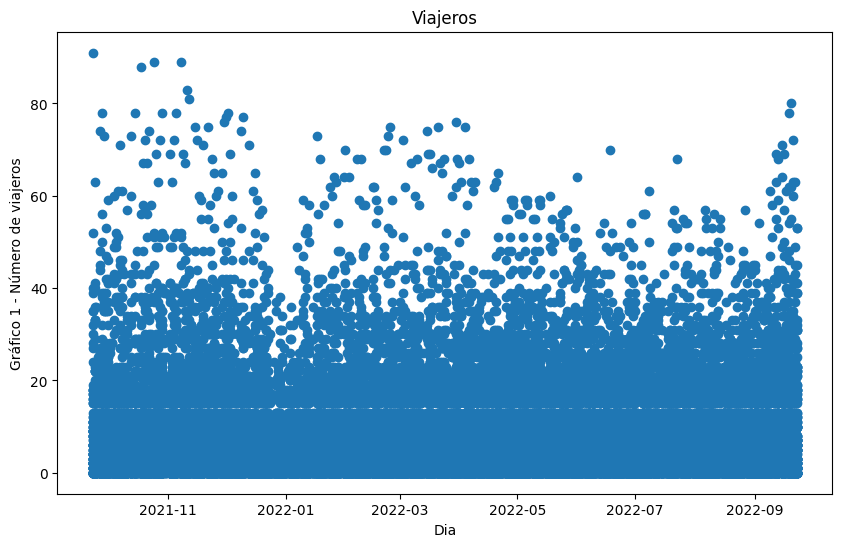

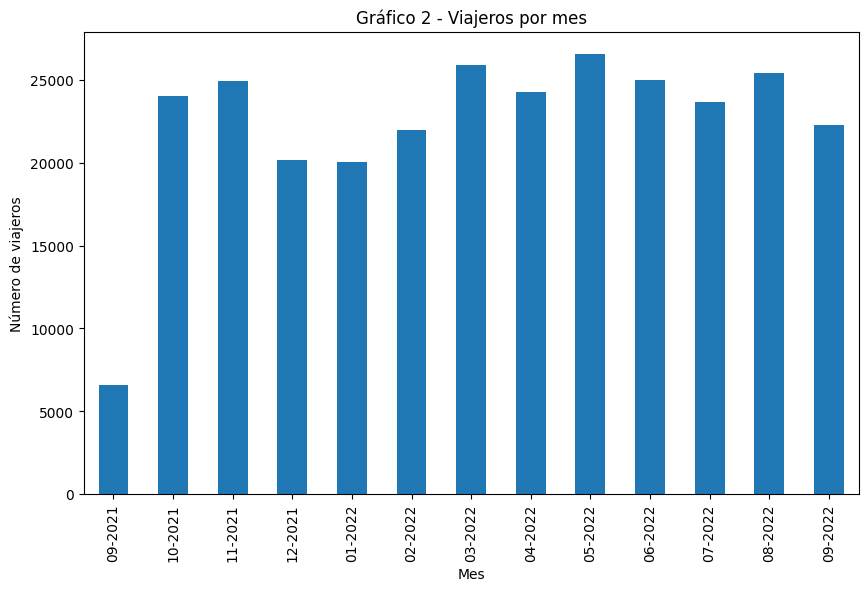

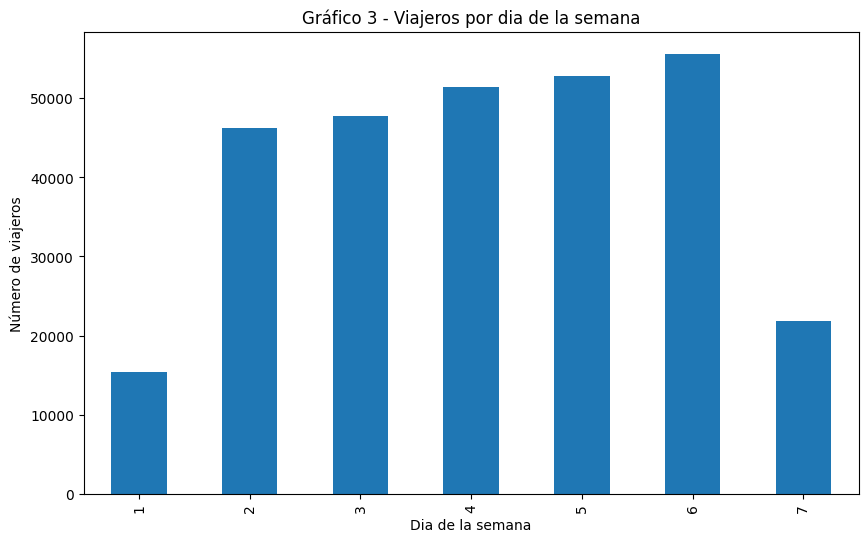

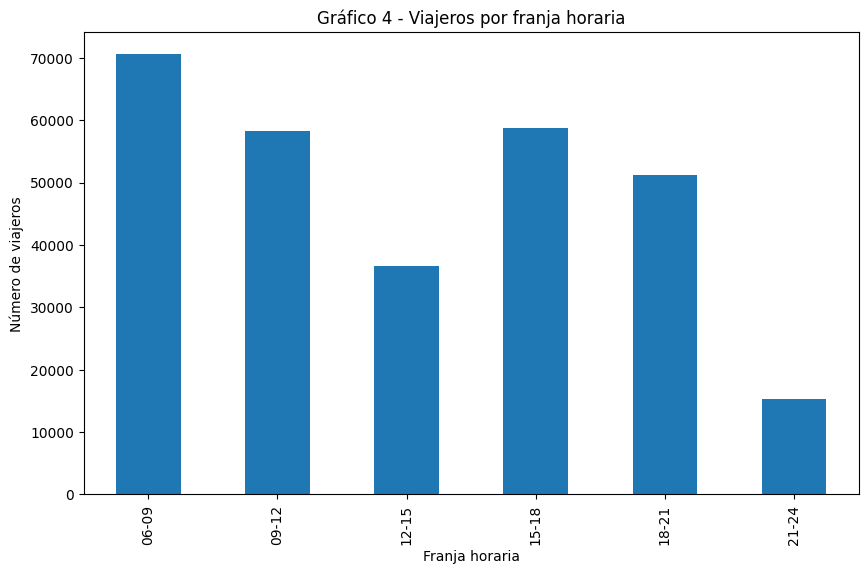

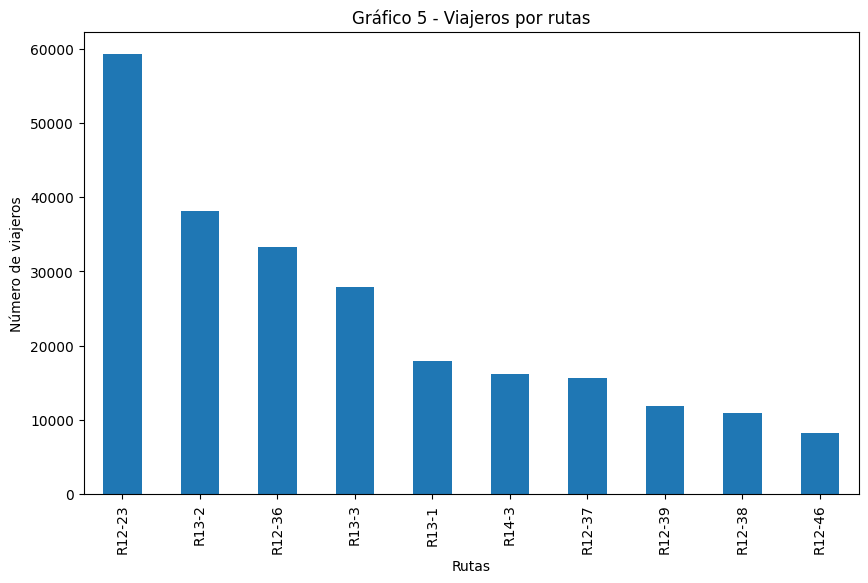

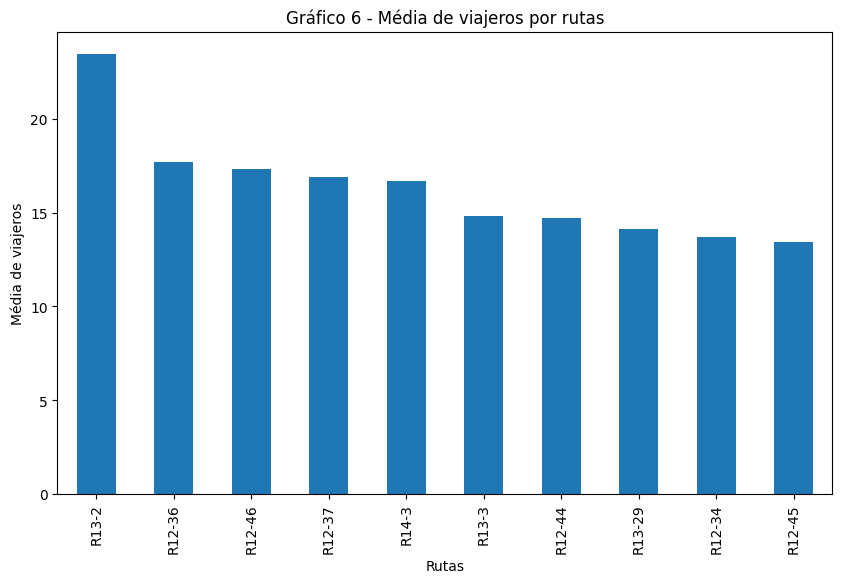

In [ ]:
#Empezamos a construir gráficos en base a analizar nuestros datos.
#En esta celda trabajamos con los viajeros.

import matplotlib.pyplot as plt

#El primer gráfico que solicitamos fue un scatter para mirar un poco el panorama\
#general y comprobar una vez más si tenemos outliers. En eje X colocamos todos\
#los días del año y en el Y los viajeros.

plt.figure(figsize=(10, 6))
plt.scatter(bus_regular["SALIDA"], bus_regular["VIAJEROS"])

plt.title("Viajeros")
plt.xlabel("Dia")
plt.ylabel("Gráfico 1 - Número de viajeros")

plt.show()

#En el segundo gráfico tenemos la suma de todos los viajeros en cada mes.
#Antes de crear el gráfico agrupamos los datos y los ordenamos.
#Tuvimos que crear la variable meses para que la label saliera en el formato deseado.

bus_regular_grouped = bus_regular.groupby('MES')['VIAJEROS'].sum().reset_index()
bus_regular_sorted = bus_regular_grouped.sort_values(by='MES')

meses = bus_regular_sorted['MES'].apply(lambda x: x.strftime('%m-%Y'))
valores = bus_regular_sorted['VIAJEROS']
ax = bus_regular_sorted.plot(x='MES', y='VIAJEROS', kind='bar', figsize=(10, 6), legend=None)

ax.set_xticklabels(meses)

plt.xlabel('Mes')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 2 - Viajeros por mes')

#En el tercer gráfico tenemos la suma de todos los viajeros por tipo de día.
bus_regular_grouped = bus_regular.groupby('TIPO_DIA')['VIAJEROS'].sum().reset_index()
bus_regular_sorted = bus_regular_grouped.sort_values(by='TIPO_DIA')
bus_regular_sorted.plot(x='TIPO_DIA', y='VIAJEROS', kind='bar', figsize=(10, 6), legend = None)

plt.xlabel('Dia de la semana')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 3 - Viajeros por dia de la semana')

#En el cuarto gráfico tenemos la suma de todos los viajeros en por franja horaria.

bus_regular_grouped = bus_regular.groupby('FRANJA_HORARIA')['VIAJEROS'].sum().reset_index()
bus_regular_sorted = bus_regular_grouped.sort_values(by='FRANJA_HORARIA')
bus_regular_sorted.plot(x='FRANJA_HORARIA', y='VIAJEROS', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Franja horaria')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 4 - Viajeros por franja horaria')

plt.show()

#En los dos siguientes gráficos tenemos una distribución de los viajeros por rutas.
#Primeramente en números absolutos y luego por media.

bus_regular_grouped = bus_regular.groupby('RUTA_U')['VIAJEROS'].sum().reset_index()
bus_regular_sorted = bus_regular_grouped.sort_values(by='VIAJEROS', ascending=False)
bus_regular_top10 = bus_regular_sorted.head(10)
bus_regular_top10.plot(x='RUTA_U', y='VIAJEROS', kind='bar', figsize=(10, 6), legend = None)

plt.xlabel('Rutas')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 5 - Viajeros por rutas')

bus_regular_grouped = bus_regular.groupby('RUTA_U')['VIAJEROS'].mean().reset_index()
bus_regular_sorted = bus_regular_grouped.sort_values(by='VIAJEROS', ascending=False)
bus_regular_top10 = bus_regular_sorted.head(10)
bus_regular_top10.plot(x='RUTA_U', y='VIAJEROS', kind='bar', figsize=(10, 6), legend = None)

plt.xlabel('Rutas')
plt.ylabel('Média de viajeros')
plt.title('Gráfico 6 - Média de viajeros por rutas')

plt.show()

Vemos en el primer gráfico una evolución más o menos constante del número de viajeros entre 09/2021 y 09/2022.

En el segundo gráfico destacamos los dos meses de septiembre que no están completos, así como el mes de mayo y noviembre (en los cuales faltan datos). Es notorio un crecimiento post-pandemia que se estabiliza en los meses de verano.

En relación al tipo de día, verificamos un resultado más o menos esperado, es decir, menos viajeros en los días de fin de semana, los cuales ofrecen menos expediciones y una ligera supremacía del viernes.

En lo tocante a la franja horaria, es clara la hegemonía de la franja 06-09. Por otro lado, la hora de vuelta no es tan clara y se reparte entre las 15 y las 21. Se destaca también para la franja entre las 9-12 lo que, por un lado puede indicar una ruptura de los parámetros típicos de viaje que obedecen a los típicos horarios de trabajo, y por otro representa una generación que utiliza el autobús para los grandes centros hospitalares. Esta posibilidad puede ser confirmada cuando analicemos rutas por separado.

En general, las rutas, tanto por media como por números absolutos siguen el mismo patrón. Hay alguns rutas, especialmente las de la familia R12, que aparecen en el top 10 por media, pero no aparecen en números absolutos.


In [ ]:
correlacion_1 = bus_regular['VIAJEROS'].corr(bus_regular['VIAJEROS/KM'])
correlacion_2 = bus_regular['VIAJEROS'].corr(bus_regular['KM'])
correlacion_3 = bus_regular['VIAJEROS'].corr(bus_regular['DURACION'])
correlacion_4 = bus_regular['VIAJEROS'].corr(bus_regular['VEL_COMERCIAL'])




print(correlacion_1)
print(correlacion_2)
print(correlacion_3)
print(correlacion_4)

0.95057038841215
0.565942128931711
0.48763798132351466
-0.11984560623062727


Calculamos las primeras correlaciones y, como era expectable, hay una correlación muy fuerte entre viajeros y viajeros km. Por otro lado, la relación entre el número de viajeros y el recorrido del viaje no es tan fuerte y llega a ser praticamente inexistente entre viajeros y velocidad comercial.


Análisis por rutas

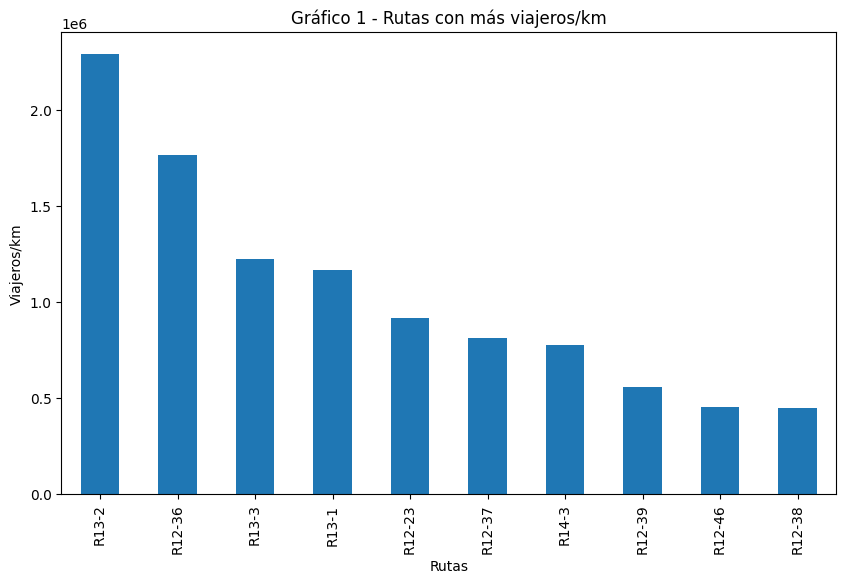

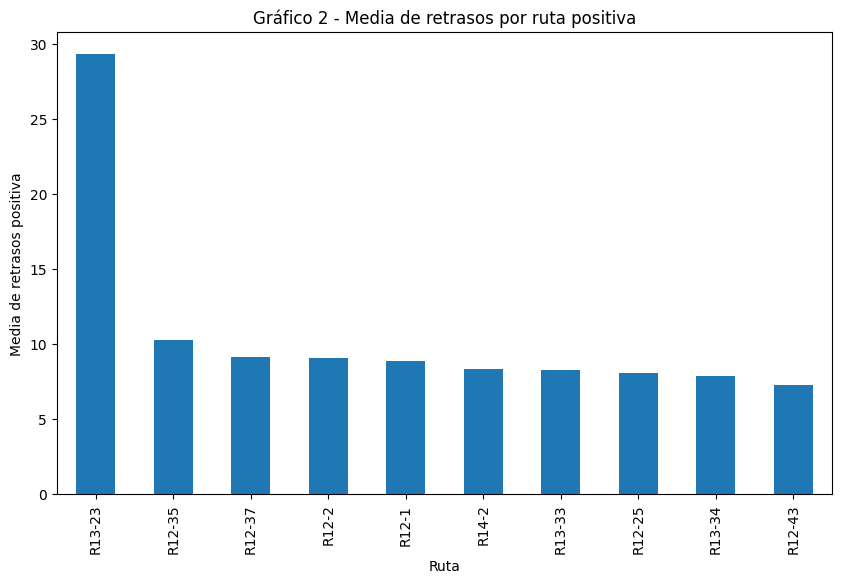

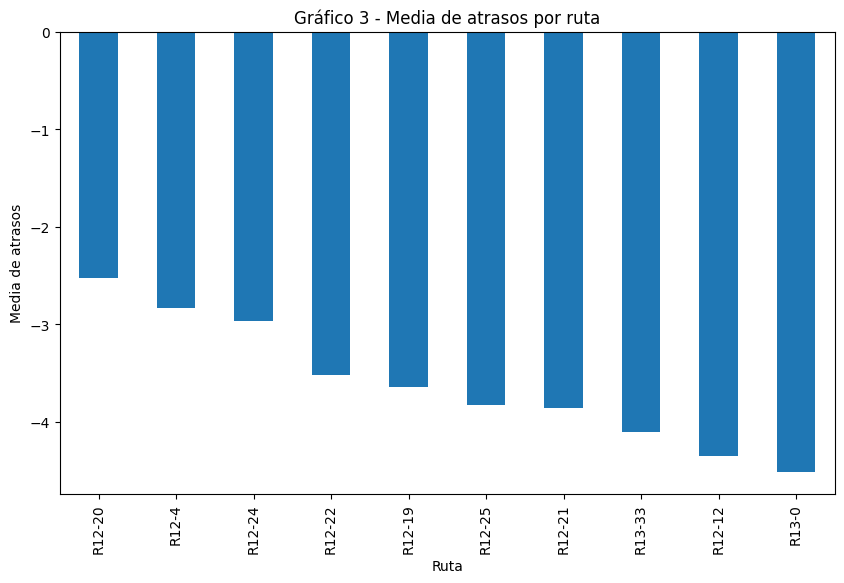

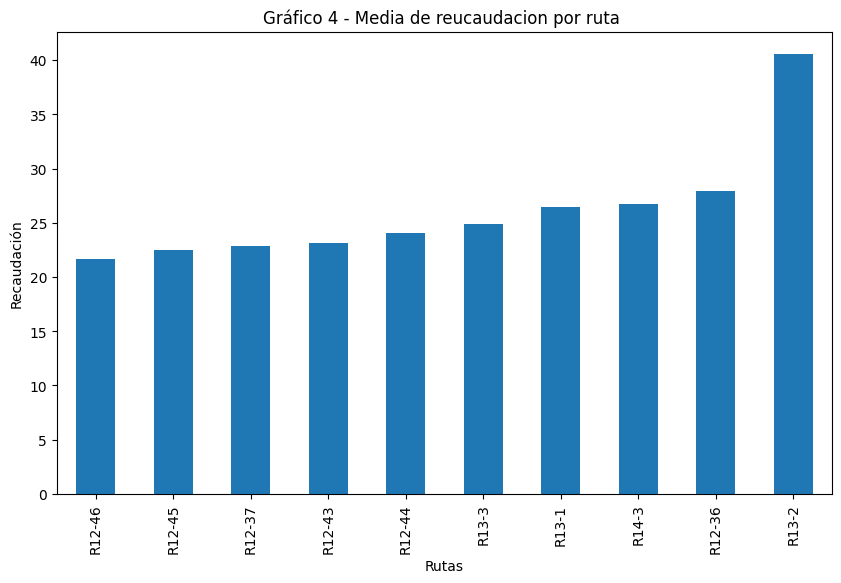

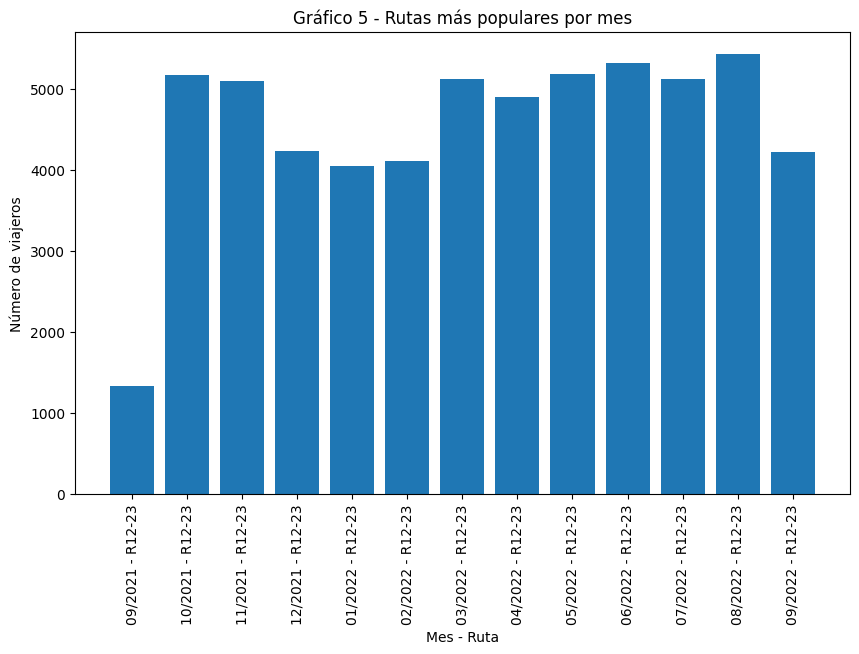

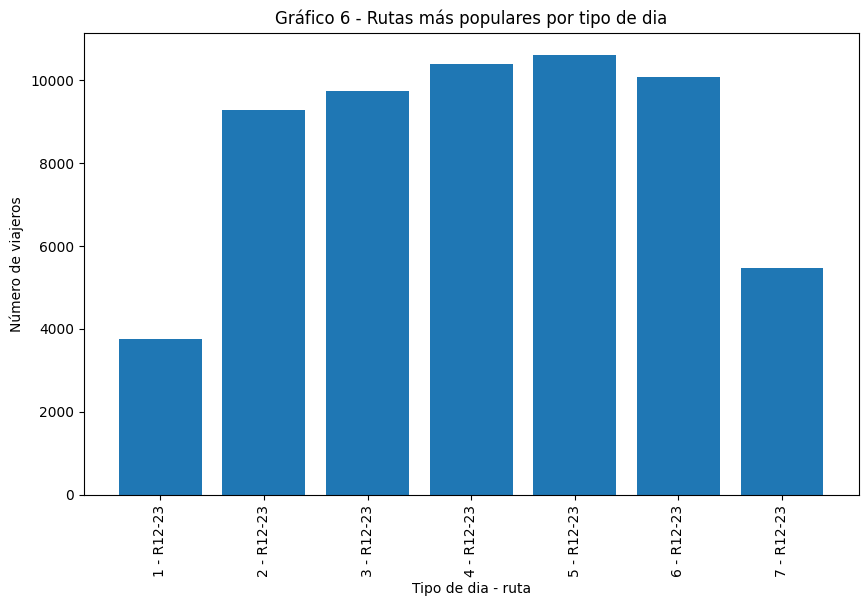

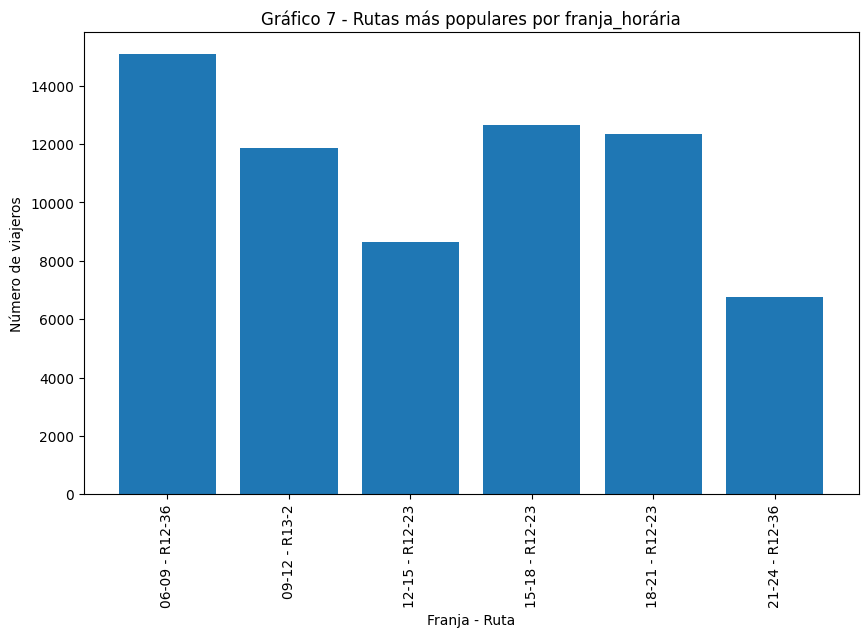

In [ ]:
#En esta celda hacemos un análisis por rutas regulares.

#Empezamos por graficar la productividad de las rutas verificando cuáles son las rutas/
#con más viajeros/km.

bus_regular_top10 = bus_regular.groupby('RUTA_U')['VIAJEROS/KM'].sum().sort_values(ascending=False).head(10).reset_index()
bus_regular_top10_sorted = bus_regular_top10.sort_values(by='VIAJEROS/KM', ascending = False)
bus_regular_top10_sorted.plot(x='RUTA_U', y='VIAJEROS/KM', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Rutas')
plt.ylabel('Viajeros/km')
plt.title('Gráfico 1 - Rutas con más viajeros/km')

plt.show()

#Seguidamente ordenamos las rutas por retrasos. En este caso solamente nos interesan\
#las diferencias positivas.

bus_regular_mean = bus_regular[bus_regular['DIFERENCIA']>0].groupby('RUTA_U')['DIFERENCIA'].mean().sort_values(ascending=False).head(10).reset_index()
bus_regular_mean.plot(x='RUTA_U', y='DIFERENCIA', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Ruta')
plt.ylabel('Media de retrasos positiva')
plt.title('Gráfico 2 - Media de retrasos por ruta positiva')

plt.show()

#Seguimos con las rutas con más retrasos teniendo en cuenta toda la columna DIFERENCIAS.

bus_regular_mean = bus_regular.groupby('RUTA_U')['DIFERENCIA'].mean().sort_values(ascending = False).head(10).reset_index()
bus_regular_mean.plot(x='RUTA_U', y='DIFERENCIA', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Ruta')
plt.ylabel('Media de atrasos')
plt.title('Gráfico 3 - Media de atrasos por ruta')

plt.show()

#Repetimos la operación anterior pero esta vez con la recaudación.
bus_regular_top10 = bus_regular.groupby('RUTA_U')['RECAUDA_TOTAL'].mean().sort_values(ascending=False).head(10).reset_index()
bus_regular_top10_sorted = bus_regular_top10.sort_values(by='RECAUDA_TOTAL')
bus_regular_top10_sorted.plot(x='RUTA_U', y='RECAUDA_TOTAL', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Rutas')
plt.ylabel('Recaudación')
plt.title('Gráfico 4 - Media de reucaudacion por ruta ')

plt.show()

#Seguidamente quisimos ver cuál era la ruta que tenía más viajeros por mes.
#Empezamos por agrupar los datos que queremos trabajar y luego sacar el valor máximo.
#Luego hicimos un bucle for para obtener la ruta más popular en cada mes.
#Creamos la variable labels con otro bucle for para encontrar la etiqueta\
#correspondiente a la combinación mes/ruta más popular.

rutas_por_mes = bus_regular.groupby(['MES', 'RUTA_U'])['VIAJEROS'].sum()
rutas_populares = rutas_por_mes.groupby('MES').idxmax()
valores_populares = [rutas_por_mes[m] for m in rutas_populares]
labels = [f"{mes.strftime('%m/%Y')} - {rota}" for mes, rota in rutas_populares]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 5 - Rutas más populares por mes')
plt.xlabel('Mes - Ruta')
plt.ylabel('Número de viajeros')

plt.show()

#Repetimos el proceso para el tipo de día y franja horaria.

rutas_por_tipo = bus_regular.groupby(['TIPO_DIA', 'RUTA_U'])['VIAJEROS'].sum()
rutas_populares = rutas_por_tipo.groupby('TIPO_DIA').idxmax()
valores_populares = [rutas_por_tipo[m] for m in rutas_populares]
labels = [f"{tipo} - {ruta}" for tipo, ruta in rutas_populares]


plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 6 - Rutas más populares por tipo de dia')
plt.xlabel('Tipo de dia - ruta')
plt.ylabel('Número de viajeros')

plt.show()

rutas_por_franja = bus_regular.groupby(['FRANJA_HORARIA', 'RUTA_U'])['VIAJEROS'].sum()
rutas_populares = rutas_por_franja.groupby('FRANJA_HORARIA').idxmax()
valores_populares = [rutas_por_franja[f] for f in rutas_populares]
labels = [f"{franja} - {rota}" for franja, rota in rutas_populares]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 7 - Rutas más populares por franja_horária')
plt.xlabel('Franja - Ruta')
plt.ylabel('Número de viajeros')

plt.show()

plt.show()


En el primer gráfico vemos que la ruta R13-2 es la que tiene el más alto índice de viajeros/km. Este resultado era esperable teniendo en consideración que es la ruta con más viajeros y también una de las más largas. Es importante destacar la ruta R12-23, que es la ruta con más viajeros absolutos, aparece en la tercera posición. Esto se explica por su corto recorrido.

En el gráfico dos vemos la media de retrasos por ruta. Este gráfico es una clara demostración de cómo la variable DIFERENCIAS tiene bastantes bias. La ruta R13-23, por ejemplo, tiene solamente tres entradas positivas, una de un minuto, otra de 17 y otra de más de 50. Eso explica la media cercana a 30.

A continuación, el siguiente gráfico nos enseña todas las diferencias y son todas negativas. Como explicamos anteriormente, ninguna línea salió antes de su hora, los conductores sí la abrieron en la máquina antes de su hora.

En lo que toca a recaudación, podemos constatar varias rutas que están en el top 10, que están también en el top 10 de número de viajeros y, como veremos más adelante, hay una correlación entre recaudación y número de viajeros.

En el gráfico 5 vemos una dominancia clara de la ruta R13-2, pero vemos también un aumento del número de viajeros (a la excepción de mayo en que faltan datos) y luego una estabilización en los meses de verano de 2022 cuando cambia la ruta dominante.

En el gráfico 6 verificamos que la ruta R13-2 domina en todos los días laborales y sábado y domingo.

En relación a la franja horaria vemos que las rutas R12-36 y R12-23 reparten el dominio.








Análisis por retrasos

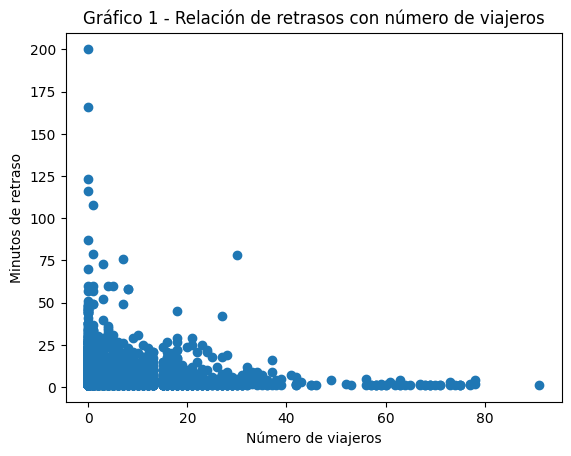

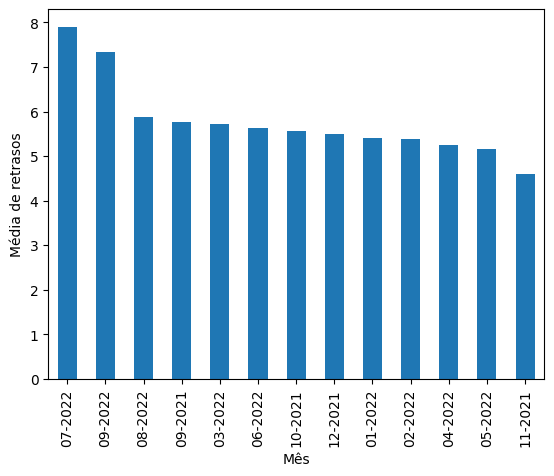

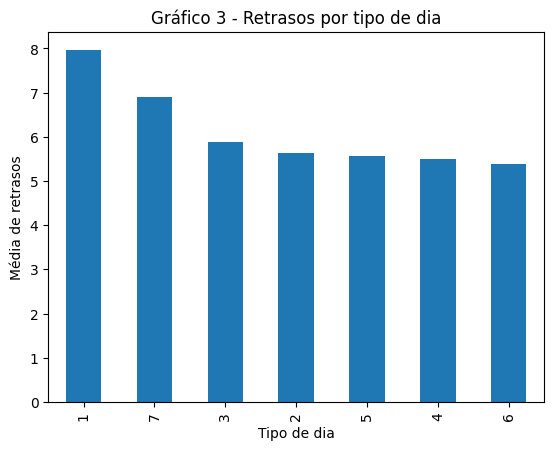

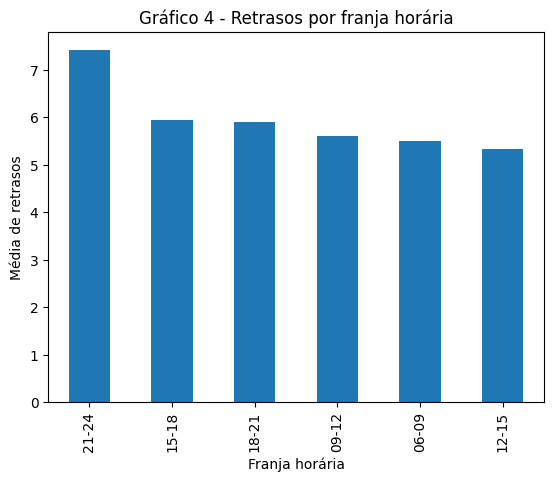

In [ ]:
#En esta celda hacemos un análisis por los restrasos aunque sabemos de antemano\
#que esta variable tiene bastantes limitaciones. Analizamos solamente las diferencias positivas.

#Empezamos con un scatter para obtener una relación entre los retrasos y el\
#número de viajeros.

dif_positivas = bus_regular[bus_regular['DIFERENCIA'] > 0]

bus_regular_ordenado_positivos = dif_positivas.sort_values(by=["VIAJEROS"])
plt.scatter(bus_regular_ordenado_positivos["VIAJEROS"], bus_regular_ordenado_positivos["DIFERENCIA"])


plt.title("Gráfico 1 - Relación de retrasos con número de viajeros")
plt.xlabel("Número de viajeros")
plt.ylabel("Minutos de retraso")

plt.show()

#Seguidamente analizamos los retrasos por mes, día de la semana y franja horaria.


retrasos_por_mes = dif_positivas.groupby('MES')['DIFERENCIA'].mean()
retrasos_por_mes = retrasos_por_mes.sort_values(ascending=False)
top_10_retrasos = retrasos_por_mes[:10]

meses = retrasos_por_mes.index.strftime('%m-%Y')

ax = retrasos_por_mes.plot(kind='bar')
ax.set_xticklabels(meses)
ax.set_xlabel('Mês')
ax.set_ylabel('Média de retrasos')

plt.show()

retrasos_por_tipo_dia = dif_positivas.groupby('TIPO_DIA')['DIFERENCIA'].mean()
retrasos_por_tipo_dia = retrasos_por_tipo_dia.sort_values(ascending=False)
top_10_retrasos_dia = retrasos_por_tipo_dia[:10]


top_10_retrasos_dia.plot(kind='bar')
plt.title('Gráfico 3 - Retrasos por tipo de dia')
plt.xlabel('Tipo de dia')
plt.ylabel('Média de retrasos')
plt.show()


retrasos_por_franja_horaria = dif_positivas.groupby('FRANJA_HORARIA')['DIFERENCIA'].mean()
retrasos_por_franja_horaria = retrasos_por_franja_horaria.sort_values(ascending=False)
top_10_retrasos_franja = retrasos_por_franja_horaria[:10]

# Creé un gráfico de barras para exhibir las medias de atrasos para esos 10 conductores.
top_10_retrasos_franja.plot(kind='bar')
plt.title('Gráfico 4 - Retrasos por franja horária')
plt.xlabel('Franja horária')
plt.ylabel('Média de retrasos')
plt.show()

plt.show()

In [ ]:
correlacion_1 = bus_regular['DIFERENCIA'].corr(bus_regular['VIAJEROS'])
correlacion_2 = bus_regular['DIFERENCIA'].corr(bus_regular['KM'])
correlacion_3 = bus_regular['DIFERENCIA'].corr(bus_regular['DURACION'])

print(correlacion_1)
print(correlacion_2)
print(correlacion_3)

-0.06769547027831403
-0.06530473401067832
-0.23914168042670866


El cálculo de las correlaciones en las diferencias demuestran una vez más la debilidad de esta variable. La correlación dice que no hay relación entre los retrasos y el número de viajeros. Por norma, el número de viajeros influye en las variancias de los tiempos de viaje.

Como ya fue referido anteriormente, los datos de retrasos están altamente corrompidos por el hecho de que la hora de salida de este dataset no reflejan la salida real, pero sí la hora de apertura de las máquinas.

Por norma, cuando una línea tiene muchos viajeros, el embarque toma más tiempo y, consecuentemente, la línea sale con retraso. Pero lo que vemos el el gráfico 1 es una realidad completamente distinta. Las líneas con más retrasos fueron las que transportaron menos viajeros.

Los demás gráficos siguen el mismo camino, los meses, días y franja horaria con más retrasos son los que presentan un menor número de viajeros.


Análisis por recaudación

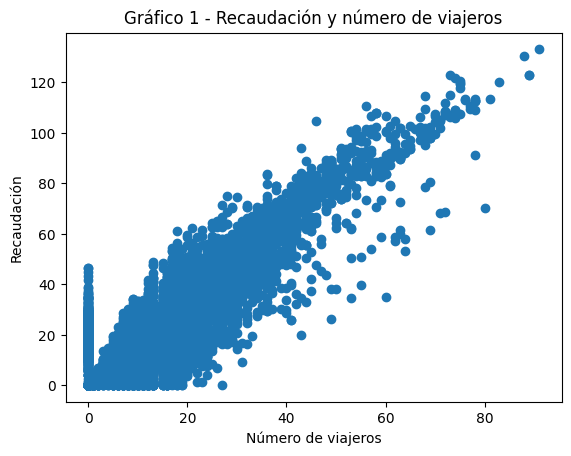

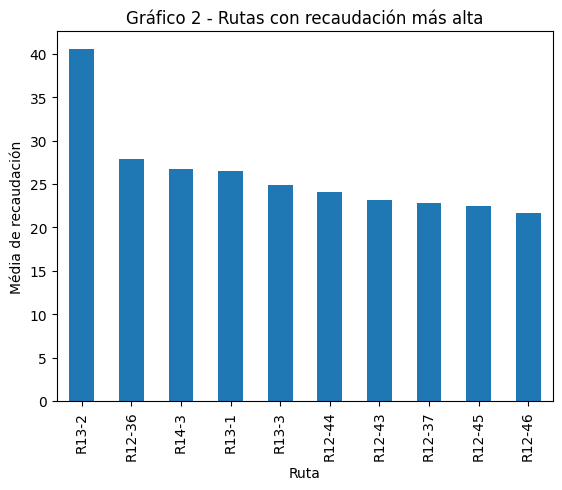

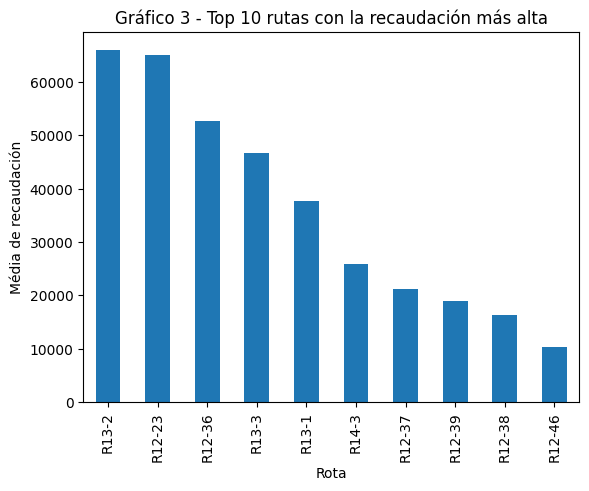

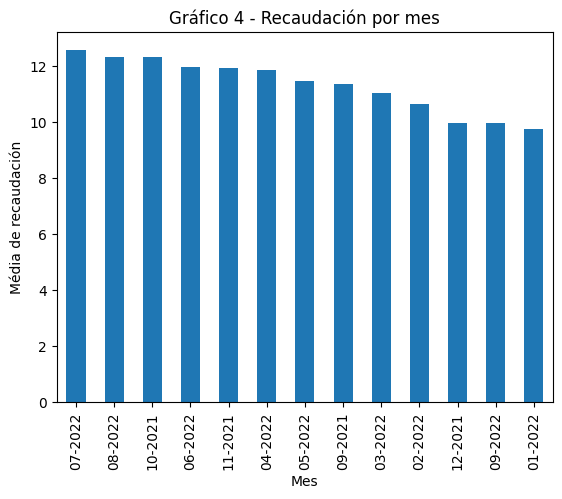

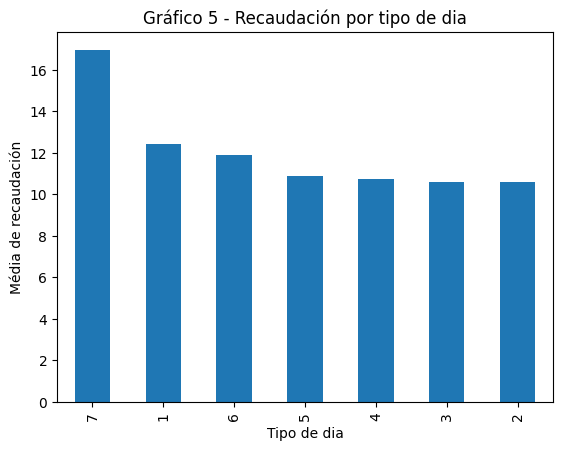

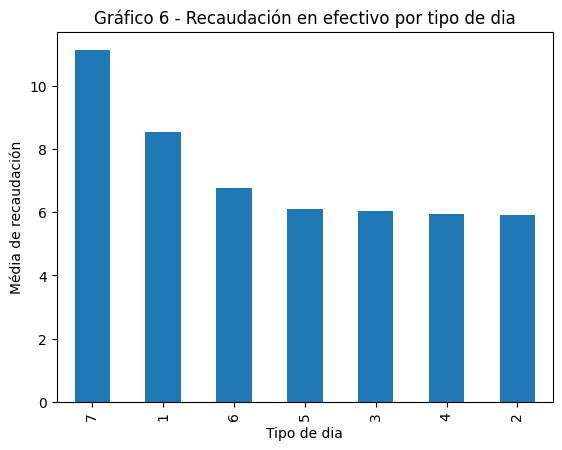

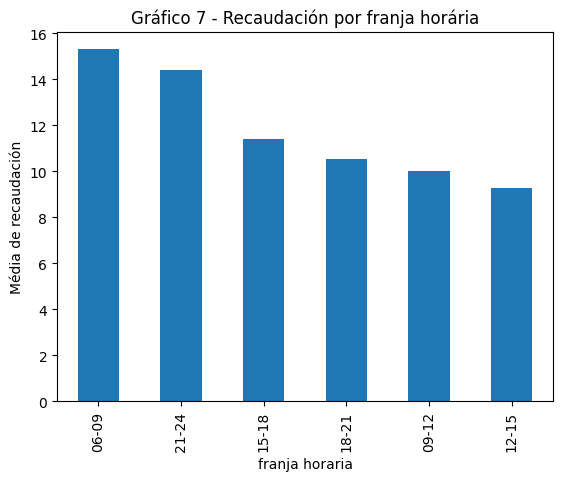

In [ ]:
#En esta celda trabajamos los datos relativos a la recaudación.

#Lo primero a analizar es la relación entre la recaudación y el número de viajeros.

bus_regular_ordenado = bus_regular.sort_values(by=["VIAJEROS"])
plt.scatter(bus_regular_ordenado["VIAJEROS"], bus_regular_ordenado["RECAUDA_TOTAL"])

plt.title("Gráfico 1 - Recaudación y número de viajeros")
plt.xlabel("Número de viajeros")
plt.ylabel("Recaudación")

plt.show()

#Seguidamente analizamos la recaudación por rutas, por media y recaudación total.
#Media

recauda_por_ruta = bus_regular.groupby('RUTA_U')['RECAUDA_TOTAL'].mean()
top_10_rutas = recauda_por_ruta.nlargest(10)

top_10_rutas.plot(kind='bar')
plt.title('Gráfico 2 - Rutas con recaudación más alta')
plt.xlabel('Ruta')
plt.ylabel('Média de recaudación')
plt.show()

#Recaudación total

recauda_por_ruta = bus_regular.groupby('RUTA_U')['RECAUDA_TOTAL'].sum()
top_10_rutas = recauda_por_ruta.nlargest(10)

top_10_rutas.plot(kind='bar')
plt.title('Gráfico 3 - Top 10 rutas con la recaudación más alta')
plt.xlabel('Rota')
plt.ylabel('Média de recaudación')
plt.show()

#Seguidamente, analizamos la relación de recaudación con el mes, tipo de día y franja horaria.

recauda_mes = bus_regular.groupby('MES')['RECAUDA_TOTAL'].mean()
recauda_mes = recauda_mes.sort_values(ascending=False)

meses = recauda_mes.index.strftime('%m-%Y')

recauda_mes.plot(kind='bar')
plt.title('Gráfico 4 - Recaudación por mes')
plt.xlabel('Mes')
plt.ylabel('Média de recaudación')
plt.xticks(range(len(meses)), meses, rotation=90)
plt.show()

#Tipo de día

recauda_t_dia = bus_regular.groupby('TIPO_DIA')['RECAUDA_TOTAL'].mean()
recauda_t_dia = recauda_t_dia.sort_values(ascending=False)

recauda_t_dia.plot(kind='bar')
plt.title('Gráfico 5 - Recaudación por tipo de dia')
plt.xlabel('Tipo de dia')
plt.ylabel('Média de recaudación')
plt.show()

recauda_t_dia = bus_regular.groupby('TIPO_DIA')['RECAUDA'].mean()
recauda_t_dia = recauda_t_dia.sort_values(ascending=False)

recauda_t_dia.plot(kind='bar')
plt.title('Gráfico 6 - Recaudación en efectivo por tipo de dia')
plt.xlabel('Tipo de dia')
plt.ylabel('Média de recaudación')
plt.show()

#Franja horaria

recauda_franja = bus_regular.groupby('FRANJA_HORARIA')['RECAUDA_TOTAL'].mean()
recauda_franja = recauda_franja.sort_values(ascending=False)

recauda_franja.plot(kind='bar')
plt.title('Gráfico 7 - Recaudación por franja horária')
plt.xlabel('franja horaria')
plt.ylabel('Média de recaudación')
plt.show()

plt.show()

El primer gráfico enseña que la recaudación es directamente proporcional al número de viajeros. El mismo gráfico demuestra que algunas entradas están corrompidas. Vemos en el gráfico que algunas recaudaciones son bastante altas cuando se transportaron cero viajeros. Por otro lado, vemos cifras de veinte viajeros transportados y una recaudación de cero.

Vemos tambien que las recaudaciones por ruta siguen el mismo patrón que el número de viajeros. Es visible que las dos rutas más populares son las que tienen más recaudación. La ruta R13-2 es más larga y, consecuentemente, sus billetes son más caros.

Por otro lado, en términos temporales, no siempre la recaudación acompaña la tendencia del número de viajeros. Por ejemplo, vemos que el día con más recaudación es el sábado. Eso se explica con el hecho de que a los sábados hay más viajeros eventuales, en otras palabras, viajeros que viajan sin tarjeta de descuento.

In [ ]:
correlacion_1 = bus_regular['RECAUDA_TOTAL'].corr(bus_regular['VIAJEROS'])
correlacion_2 = bus_regular['RECAUDA_TOTAL'].corr(bus_regular['KM'])



print(correlacion_1)
print(correlacion_2)


0.9278739504128127
0.6620199196458981


Hay una correlación muy fuerte entre recaudación y el número de viajeros. Hay tambien una correlación considerable entre la recaudación y la largura de los recorridos. Estos datos nos parecen perfectamente normales.


***Análisis de rutas escolares***

In [ ]:
Análisis por viajeros

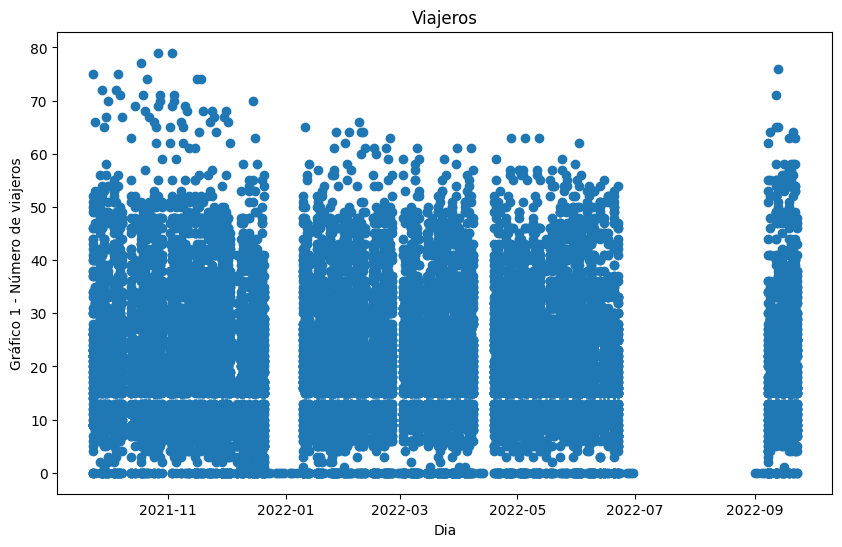

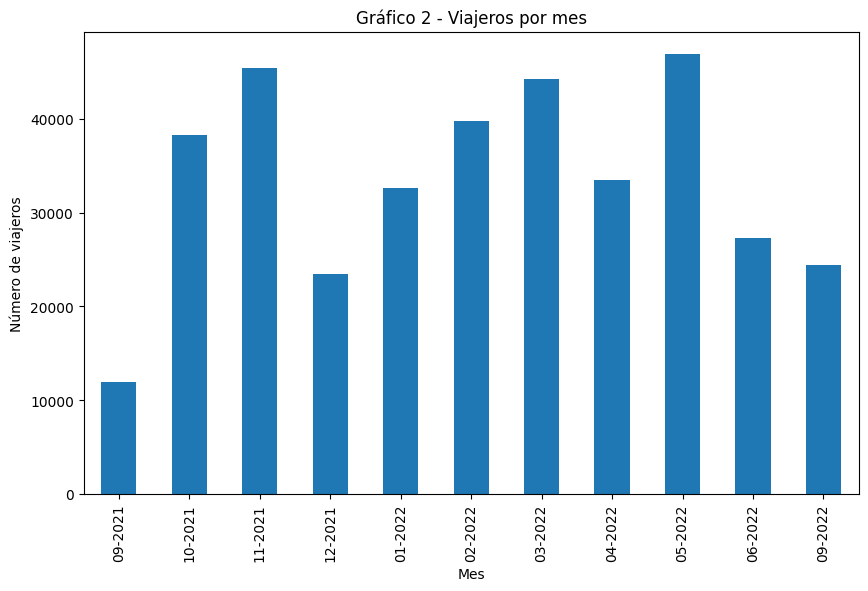

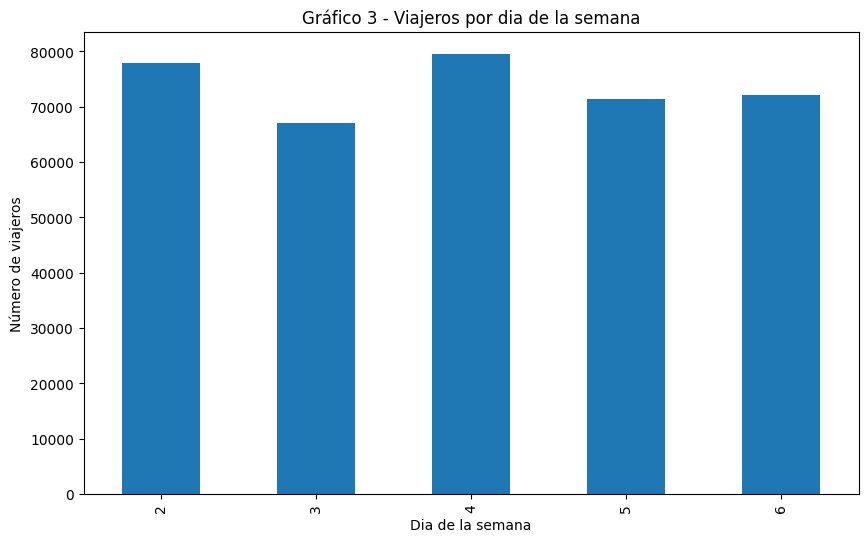

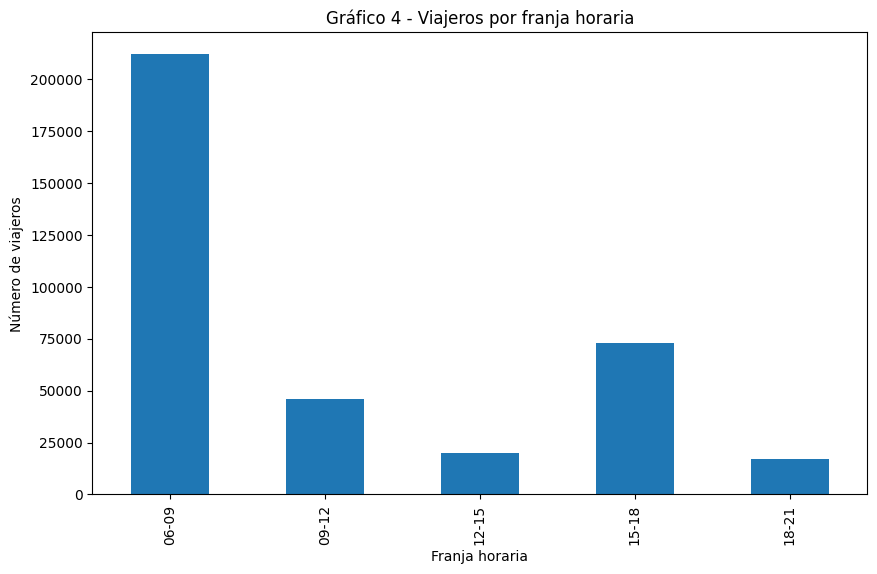

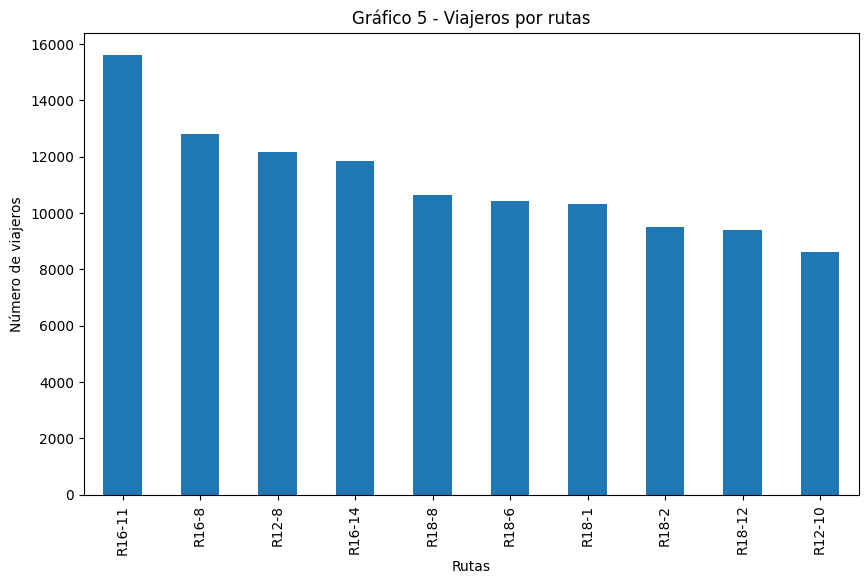

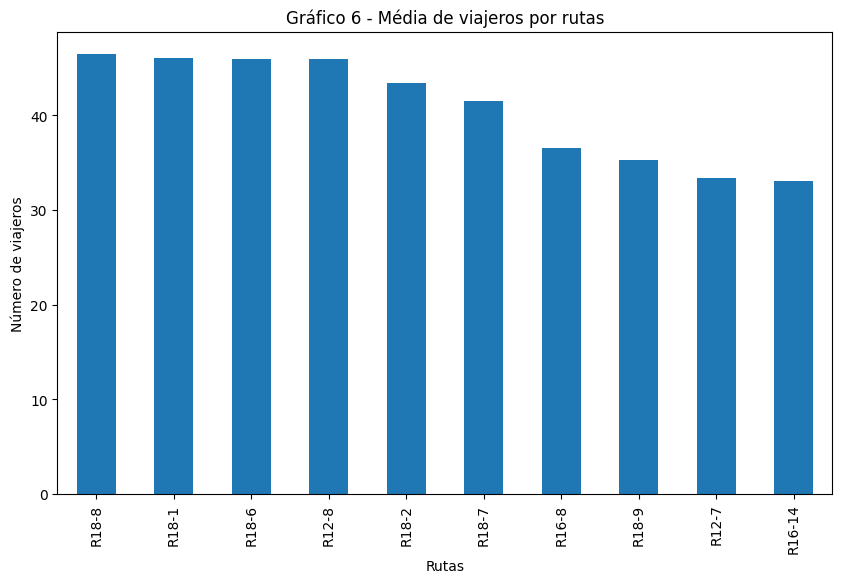

In [ ]:
#A partir de aquí repetimos las operaciones hechas con las líneas regulares en\
#las líneas escolares.
#En esta celda trabajamos con los viajeros.

import matplotlib.pyplot as plt

#El primer gráfico que solicitamos fue un scatter para mirar un poco el panorama\
#general y comprobar una vez más si tenemos outliers. En eje X colocamos todos\
#los días del año y en el Y los viajeros.

plt.figure(figsize=(10, 6))
plt.scatter(bus_escolar["SALIDA"], bus_escolar["VIAJEROS"])

plt.title("Viajeros")
plt.xlabel("Dia")
plt.ylabel("Gráfico 1 - Número de viajeros")

plt.show()

#En el segundo gráfico tenemos la suma de todos los viajeros en cada mes.
#Antes de crear el gráfico agrupamos los datos y los ordenamos.
#Tuvimos que crear la variable meses para que la label salise en el formato deseado.

bus_escolar_grouped = bus_escolar.groupby('MES')['VIAJEROS'].sum().reset_index()
bus_escolar_sorted = bus_escolar_grouped.sort_values(by='MES')

meses = bus_escolar_sorted['MES'].apply(lambda x: x.strftime('%m-%Y'))
valores = bus_escolar_sorted['VIAJEROS']
ax = bus_escolar_sorted.plot(x='MES', y='VIAJEROS', kind='bar', figsize=(10, 6), legend=None)

ax.set_xticklabels(meses)

plt.xlabel('Mes')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 2 - Viajeros por mes')

plt.show()

#En el tercer gráfico tenemos la suma de todos los viajeros por tipo de día.
bus_escolar_grouped = bus_escolar.groupby('TIPO_DIA')['VIAJEROS'].sum().reset_index()
bus_escolar_sorted = bus_escolar_grouped.sort_values(by='TIPO_DIA')
bus_escolar_sorted.plot(x='TIPO_DIA', y='VIAJEROS', kind='bar', figsize=(10, 6), legend = None)

plt.xlabel('Dia de la semana')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 3 - Viajeros por dia de la semana')

plt.show()

#En el cuarto gráfico tenemos la suma de todos los viajeros en por franja horaria.

bus_escolar_grouped = bus_escolar.groupby('FRANJA_HORARIA')['VIAJEROS'].sum().reset_index()
bus_escolar_sorted = bus_escolar_grouped.sort_values(by='FRANJA_HORARIA')
bus_escolar_sorted.plot(x='FRANJA_HORARIA', y='VIAJEROS', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Franja horaria')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 4 - Viajeros por franja horaria')

plt.show()

#En los dos siguientes gráficos tenemos una distribución de los viajeros por rutas.
#Primeramente en números absolutos y luego por media.

bus_escolar_grouped = bus_escolar.groupby('RUTA_U')['VIAJEROS'].sum().reset_index()
bus_escolar_sorted = bus_escolar_grouped.sort_values(by='VIAJEROS', ascending=False)
bus_escolar_top10 = bus_escolar_sorted.head(10)
bus_escolar_top10.plot(x='RUTA_U', y='VIAJEROS', kind='bar', figsize=(10, 6), legend = None)

plt.xlabel('Rutas')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 5 - Viajeros por rutas')

plt.show()

bus_escolar_grouped = bus_escolar.groupby('RUTA_U')['VIAJEROS'].mean().reset_index()
bus_escolar_sorted = bus_escolar_grouped.sort_values(by='VIAJEROS', ascending=False)
bus_escolar_top10 = bus_escolar_sorted.head(10)
bus_escolar_top10.plot(x='RUTA_U', y='VIAJEROS', kind='bar', figsize=(10, 6), legend = None)

plt.xlabel('Rutas')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 6 - Média de viajeros por rutas')

plt.show()

Los análisis de rutas escolares siguen patrones diferentes de las líneas regulares.

Para empezar, hay dos meses al año y dos dias a la semana en los cuales no hay expediciones, y consecuentemente, no hay viajeros. Julio y agosto y sábado y domingo.

El número de viajeros tiene pequeñas variancias al largo de la semana, una vez que hay institutos que tienen clases por las tardes una vez a la semana.

En lo que respecta a la franja horária hay una clara predominancia de de las tres primeras horas de la mañana. Sin embargo, la falta de viajeros en las demás franjas horárias, especialmente entre 12-15, llevanos a concluir que grande parte de los datos eliminados por sus daños en la hora de salida se encontraban en esta franja horária.





In [ ]:
correlacion_1 = bus_escolar['VIAJEROS'].corr(bus_escolar['VIAJEROS/KM'])
correlacion_2 = bus_escolar['VIAJEROS'].corr(bus_escolar['KM'])
correlacion_3 = bus_escolar['VIAJEROS'].corr(bus_escolar['DURACION'])




print(correlacion_1)
print(correlacion_2)
print(correlacion_3)

0.7089570582799591
0.02521320042126118
0.17074416487031924


Si comparamos estas correlaciones con las que fueron obtenidas en las lineas regulares concluimos que las mismas no son tan furtes. Lo que pon en evidencia la particularidad de los recorridos escolares.

Análisis por rutas

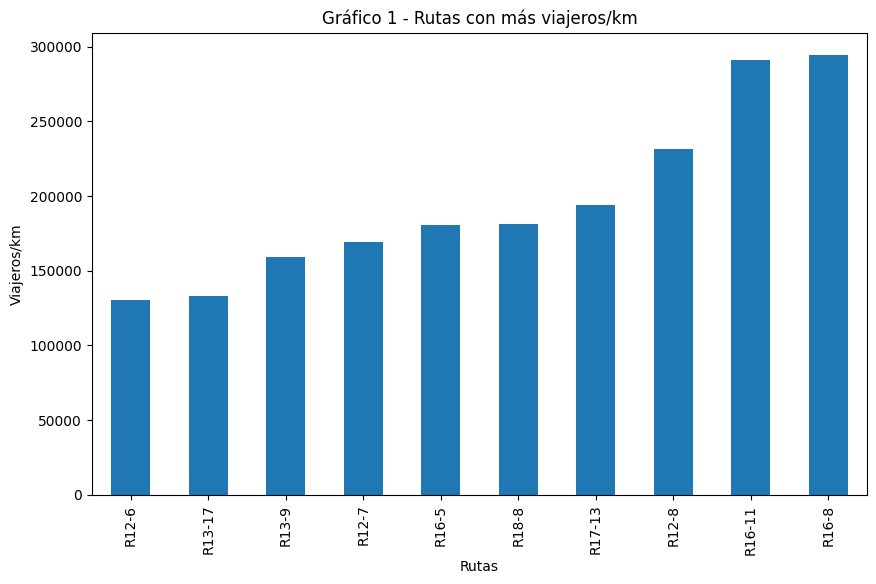

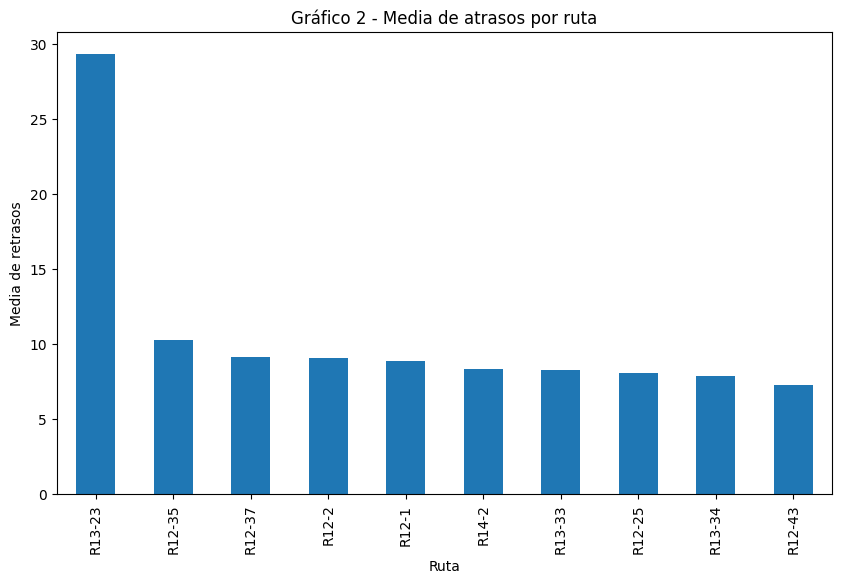

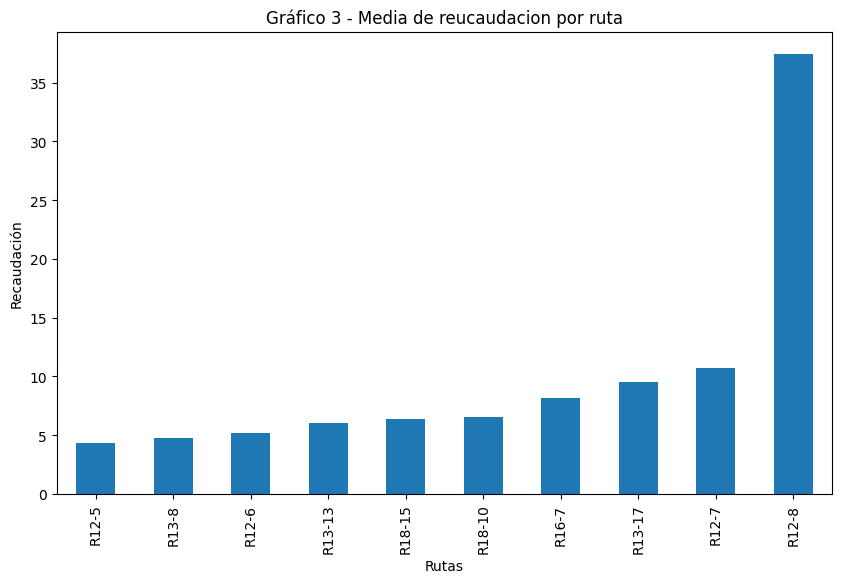

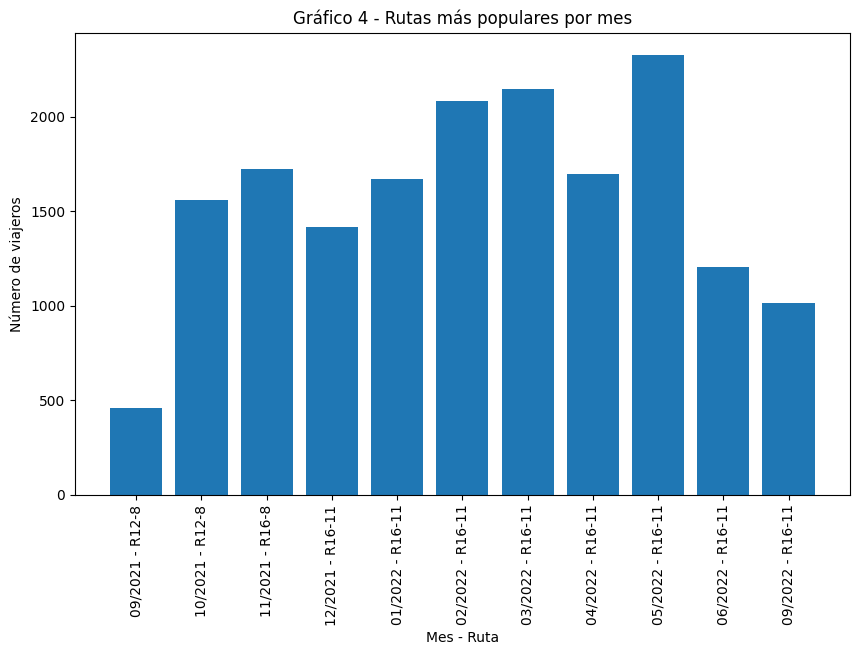

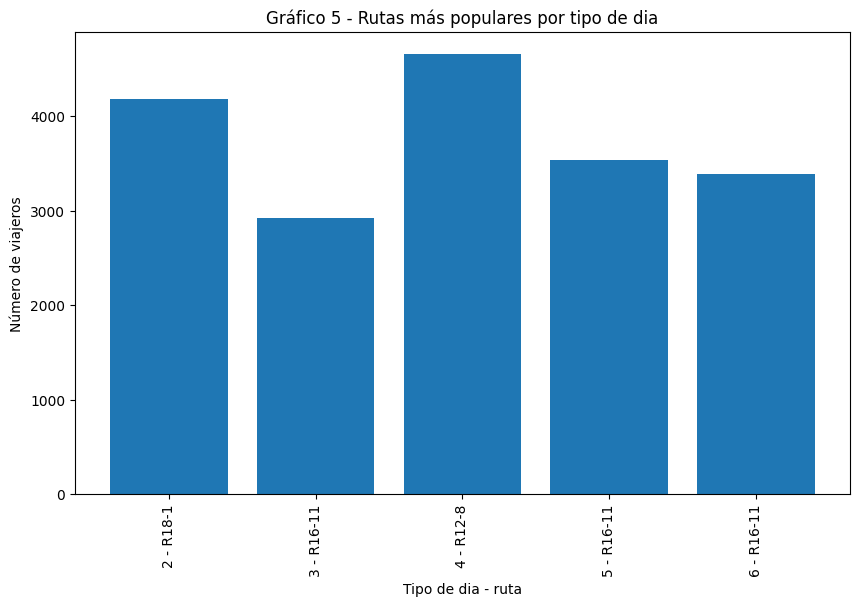

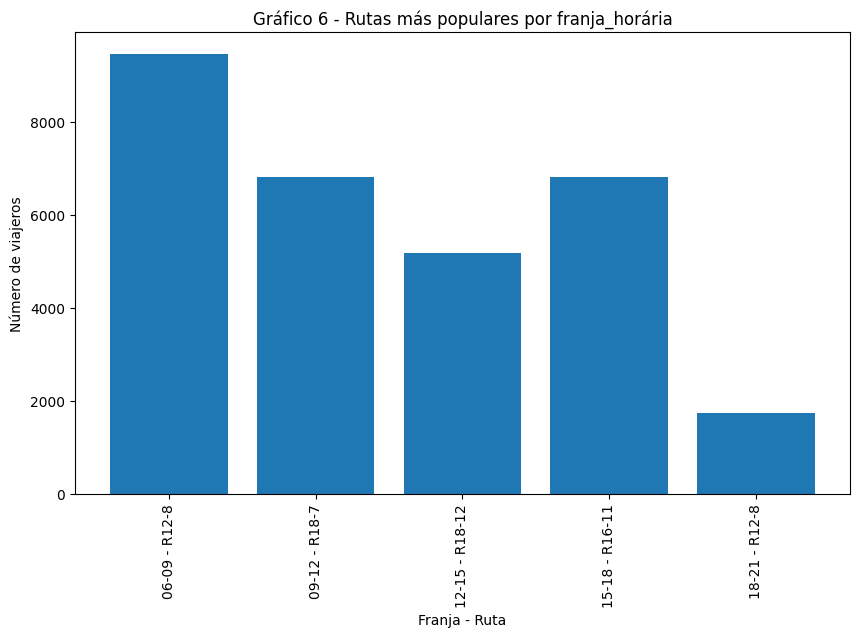

In [ ]:
#En esta celda hacemos un análisis por rutas escolares.

#Empezamos por graficar la productividad de las rutas verificando cuáles son las rutas/
#con más viajeros/km.

bus_escolar_top10 = bus_escolar.groupby('RUTA_U')['VIAJEROS/KM'].sum().sort_values(ascending=False).head(10).reset_index()
bus_escolar_top10_sorted = bus_escolar_top10.sort_values(by='VIAJEROS/KM')
bus_escolar_top10_sorted.plot(x='RUTA_U', y='VIAJEROS/KM', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Rutas')
plt.ylabel('Viajeros/km')
plt.title('Gráfico 1 - Rutas con más viajeros/km')

plt.show()

#Seguidamente ordenamos las rutas por retrasos. En este caso solamente nos interesan\
#las diferencias positivas.

bus_escolar_mean = bus_regular[bus_regular['DIFERENCIA'] > 0].groupby('RUTA_U')['DIFERENCIA'].mean().sort_values(ascending=False).head(10).reset_index()
bus_escolar_mean.plot(x='RUTA_U', y='DIFERENCIA', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Ruta')
plt.ylabel('Media de retrasos')
plt.title('Gráfico 2 - Media de atrasos por ruta')

plt.show()

#Repetimos la operación anterior, pero esta vez con la recaudación.
bus_escolar_top10 = bus_escolar.groupby('RUTA_U')['RECAUDA_TOTAL'].mean().sort_values(ascending=False).head(10).reset_index()
bus_escolar_top10_sorted = bus_escolar_top10.sort_values(by='RECAUDA_TOTAL')
bus_escolar_top10_sorted.plot(x='RUTA_U', y='RECAUDA_TOTAL', kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Rutas')
plt.ylabel('Recaudación')
plt.title('Gráfico 3 - Media de reucaudacion por ruta')

plt.show()

#Seguidamente quisimos ver cuál era la ruta que tenía más viajeros por mes.
#Empezamos por agrupar los datos con los que queremos trabajar y luego sacar el valor máximo.
#Luego hicimos un bucle for para obtener la ruta más popular en cada mes.
#Creamos la variable labels con otro bucle for para encontrar la etiqueta\
#correspondiente a la combinacion mes/ruta más popular.

rutas_por_mes = bus_escolar.groupby(['MES', 'RUTA_U'])['VIAJEROS'].sum()
rutas_populares = rutas_por_mes.groupby('MES').idxmax()
valores_populares = [rutas_por_mes[m] for m in rutas_populares]
labels = [f"{mes.strftime('%m/%Y')} - {rota}" for mes, rota in rutas_populares]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 4 - Rutas más populares por mes')
plt.xlabel('Mes - Ruta')
plt.ylabel('Número de viajeros')

plt.show()

#Repetimos el proceso para el tipo de día y franja horaria.

rutas_por_tipo = bus_escolar.groupby(['TIPO_DIA', 'RUTA_U'])['VIAJEROS'].sum()
rutas_populares = rutas_por_tipo.groupby('TIPO_DIA').idxmax()
valores_populares = [rutas_por_tipo[m] for m in rutas_populares]
labels = [f"{tipo} - {ruta}" for tipo, ruta in rutas_populares]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 5 - Rutas más populares por tipo de dia')
plt.xlabel('Tipo de dia - ruta')
plt.ylabel('Número de viajeros')

plt.show()

rutas_por_franja = bus_escolar.groupby(['FRANJA_HORARIA', 'RUTA_U'])['VIAJEROS'].sum()
rutas_populares = rutas_por_franja.groupby('FRANJA_HORARIA').idxmax()
valores_populares = [rutas_por_franja[f] for f in rutas_populares]
labels = [f"{franja} - {rota}" for franja, rota in rutas_populares]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 6 - Rutas más populares por franja_horária')
plt.xlabel('Franja - Ruta')
plt.ylabel('Número de viajeros')

plt.show()

Analisando los datos escolares por rutas concluiomos, primeramente, que las distribuicion por viajeros-km sigue un patrón muy parecido a la distribuición del número de viajeros.

En los restantes gráficos vemos una predominancia de la ruta R16-11, tanto en los diferentes dias de la semana, excepto lunes y miercoles. Hay que notar que esta ruta no tiene expediciones puntuales por las tardes.


Análisis por retrasos

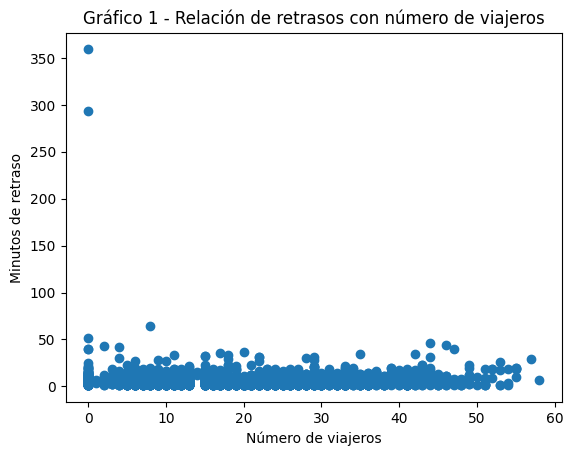

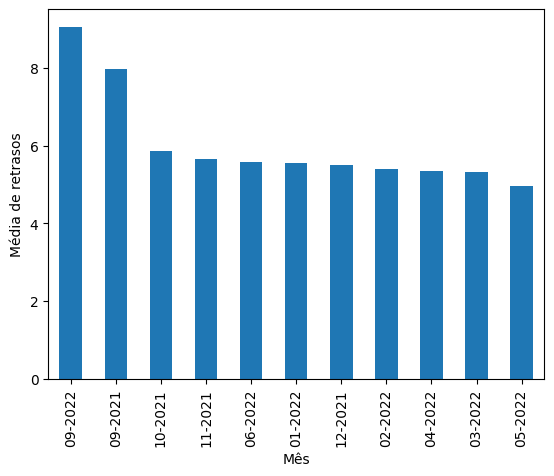

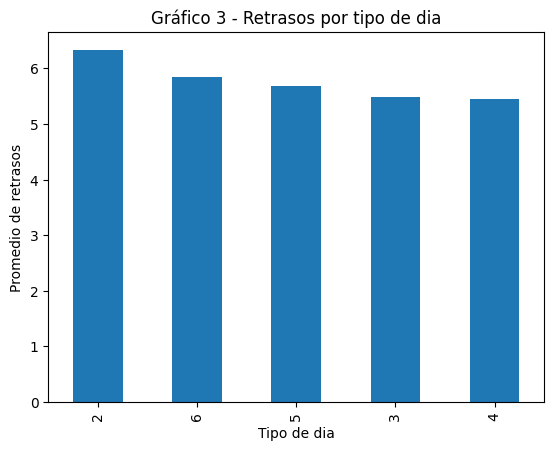

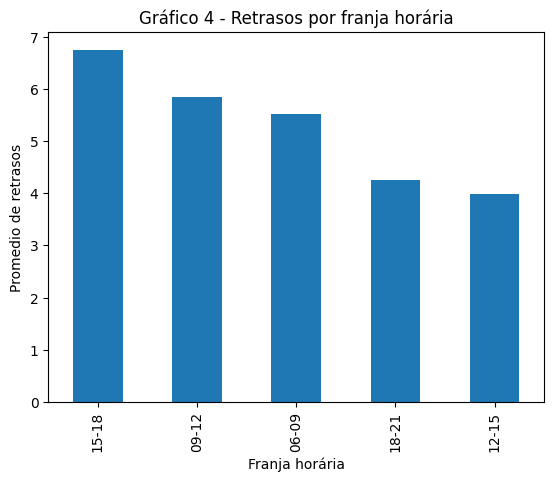

In [ ]:
#En esta celda hacemos un análisis por los restrasos aunque sabemos de antemano\
#que esta variable tiene bastantes limitaciones. Analizamos solamente las diferencias positivas.

#Empezamos con un scatter para obtener una relación entre los retrasos y el\
#número de viajeros.

dif_positivas = bus_escolar[bus_escolar['DIFERENCIA'] > 0]

bus_escolar_ordenado_positivos = dif_positivas.sort_values(by=["VIAJEROS"])
plt.scatter(bus_escolar_ordenado_positivos["VIAJEROS"], bus_escolar_ordenado_positivos["DIFERENCIA"])

plt.title("Gráfico 1 - Relación de retrasos con número de viajeros")
plt.xlabel("Número de viajeros")
plt.ylabel("Minutos de retraso")

plt.show()

#Seguidamente analizamos los retrasos por mes, día de la semana y franja horaria.

retrasos_por_mes = dif_positivas.groupby('MES')['DIFERENCIA'].mean()
retrasos_por_mes = retrasos_por_mes.sort_values(ascending=False)
top_10_retrasos = retrasos_por_mes[:10]

meses = retrasos_por_mes.index.strftime('%m-%Y')

ax = retrasos_por_mes.plot(kind='bar')
ax.set_xticklabels(meses)
ax.set_xlabel('Mês')
ax.set_ylabel('Média de retrasos')

plt.show()

retrasos_por_tipo_dia = dif_positivas.groupby('TIPO_DIA')['DIFERENCIA'].mean()
retrasos_por_tipo_dia = retrasos_por_tipo_dia.sort_values(ascending=False)
top_10_retrasos_dia = retrasos_por_tipo_dia[:10]

top_10_retrasos_dia.plot(kind='bar')
plt.title('Gráfico 3 - Retrasos por tipo de dia')
plt.xlabel('Tipo de dia')
plt.ylabel('Promedio de retrasos')
plt.show()

retrasos_por_franja_horaria = dif_positivas.groupby('FRANJA_HORARIA')['DIFERENCIA'].mean()
retrasos_por_franja_horaria = retrasos_por_franja_horaria.sort_values(ascending=False)
top_10_retrasos_franja = retrasos_por_franja_horaria[:10]

#Creamos un gráfico de barras para exhibir las medias de atrasos para esos 10 conductores.
top_10_retrasos_franja.plot(kind='bar')
plt.title('Gráfico 4 - Retrasos por franja horária')
plt.xlabel('Franja horária')
plt.ylabel('Promedio de retrasos')
plt.show()

plt.show()

Haciendo un repaso por los retrasos notase una fuerte consistencia de los datos. Por otras palabras, los datos son bastante similares. Los únicos destaques van para los dos meses de septiembre en los cuales suele a haber un poco más de desorden que luego desaparecen.

In [ ]:
correlacion_1 = bus_escolar['DIFERENCIA'].corr(bus_escolar['VIAJEROS'])
correlacion_2 = bus_escolar['DIFERENCIA'].corr(bus_escolar['KM'])
correlacion_3 = bus_escolar['DIFERENCIA'].corr(bus_escolar['DURACION'])

print(correlacion_1)
print(correlacion_2)
print(correlacion_3)

-0.15842277034704638
0.0415620836251389
-0.4247623545208048


En el caso de las diferencias de tiempo (retrasos) los patrones escolares son similares a los de las lineas regulares, lo que confirma la corrupcion de estos datos.

In [ ]:
Análisis por recaudación

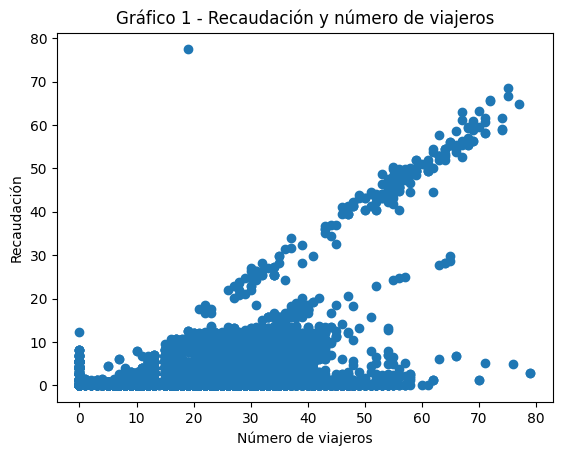

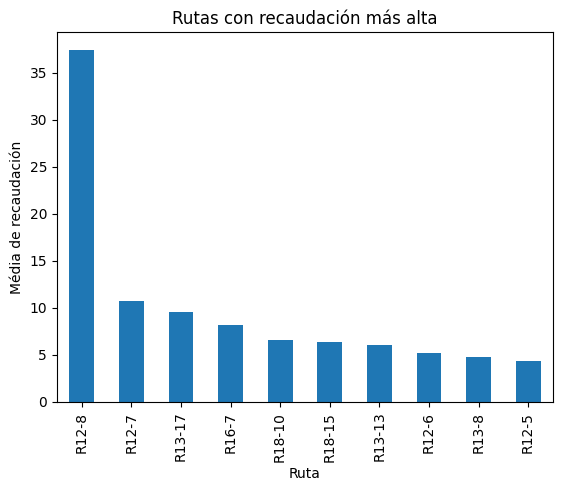

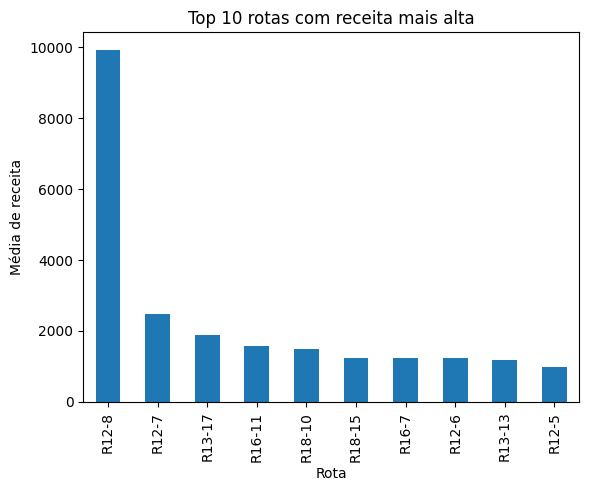

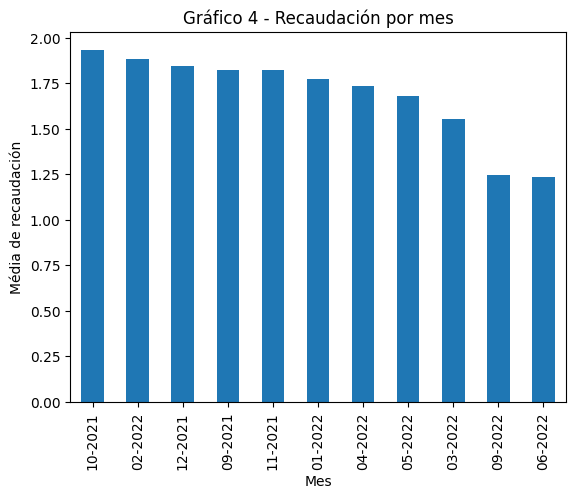

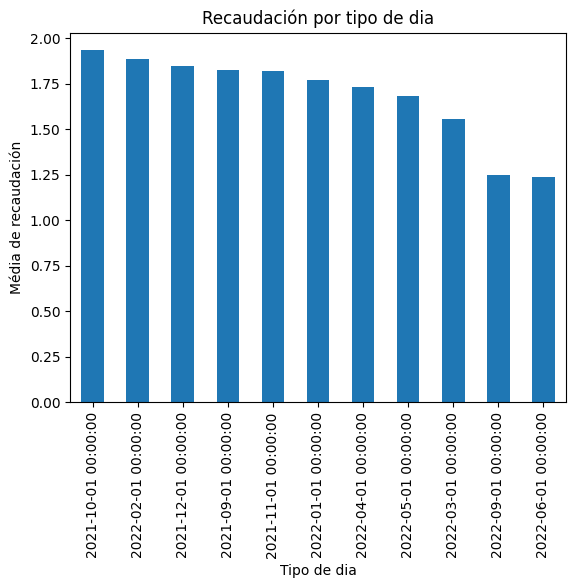

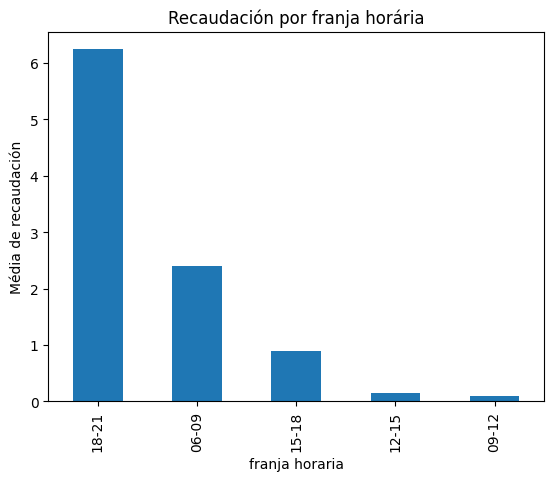

In [ ]:
#En esta celda trabajamos los datos relativos a la recaudación.

#Lo primero a analizar es la relación entre la recaudación y el número de viajeros.

bus_escolar_ordenado = bus_escolar.sort_values(by=["VIAJEROS"])
plt.scatter(bus_escolar_ordenado["VIAJEROS"], bus_escolar_ordenado["RECAUDA_TOTAL"])

plt.title("Gráfico 1 - Recaudación y número de viajeros")
plt.xlabel("Número de viajeros")
plt.ylabel("Recaudación")

plt.show()

#Seguidamente analizamos la recaudación por rutas, por media y recaudación total.
#Media

recauda_por_ruta = bus_escolar.groupby('RUTA_U')['RECAUDA_TOTAL'].mean()
top_10_rutas = recauda_por_ruta.nlargest(10)

top_10_rutas.plot(kind='bar')
plt.title('Rutas con recaudación más alta')
plt.xlabel('Ruta')
plt.ylabel('Média de recaudación')
plt.show()

#Recaudación total

recauda_por_ruta = bus_escolar.groupby('RUTA_U')['RECAUDA_TOTAL'].sum()
top_10_rutas = recauda_por_ruta.nlargest(10)

top_10_rutas.plot(kind='bar')
plt.title('Top 10 rotas com receita mais alta')
plt.xlabel('Rota')
plt.ylabel('Média de receita')
plt.show()

#Seguidamente analizamos la relación de recaudación con el mes, tipo de día y franja horaria.

recauda_mes = bus_escolar.groupby('MES')['RECAUDA_TOTAL'].mean()
recauda_mes = recauda_mes.sort_values(ascending=False)

meses = recauda_mes.index.strftime('%m-%Y')

recauda_mes.plot(kind='bar')
plt.title('Gráfico 4 - Recaudación por mes')
plt.xlabel('Mes')
plt.ylabel('Média de recaudación')
plt.xticks(range(len(meses)), meses, rotation=90)
plt.show()

#Tipo de día

recauda_t_dia = bus_escolar.groupby('TIPO_DIA')['RECAUDA_TOTAL'].mean()
recauda_t_dia = recauda_mes.sort_values(ascending=False)

recauda_t_dia.plot(kind='bar')
plt.title('Recaudación por tipo de dia')
plt.xlabel('Tipo de dia')
plt.ylabel('Média de recaudación')
plt.show()

#Franja horaria

recauda_franja = bus_escolar.groupby('FRANJA_HORARIA')['RECAUDA_TOTAL'].mean()
recauda_franja = recauda_franja.sort_values(ascending=False)

recauda_franja.plot(kind='bar')
plt.title('Recaudación por franja horária')
plt.xlabel('franja horaria')
plt.ylabel('Média de recaudación')
plt.show()

plt.show()

Cuando se analisan rutas de autobuses, es en la recaudación que se notas las diferencias más grandes entre rutas regulares y escolares. Empezando por el gráfico 1 vemos que la relación entre la recuadación y el número de viajeros no es tan proporcional. Esto se debe al hecho de que hay rutas en que los niños no pagan por su billete.

Seguidamente vemos la ruta R12-8 con bastante recaudacion por ser una ruta con todos los niños pagantes, con bastantes viajeros, y tambien por transportar viajeros no escolares, una vez que se trata de una ruta integrada en la cual pueden viajar personas no escolares.

Aunque veamos alguna regularidad al largo del año, lo mismo no se puede decir en lo que toca a los dias de la semana que es donde vemos un boom a los miercoles, el dia en que el instituto servido por esta ruta tiene clases por las tardes.

In [ ]:
correlacion_1 = bus_escolar['RECAUDA_TOTAL'].corr(bus_escolar['VIAJEROS'])
correlacion_2 = bus_escolar['RECAUDA_TOTAL'].corr(bus_escolar['KM'])



print(correlacion_1)
print(correlacion_2)

0.3605388457175665
0.2749518715717464


Estos resultados eran expectables después de analisarmos los datos de la recaudación en rutas escolares. Los datos nos dicen claramente que más viajeros no significan una mayor recaudación.

***Análisis de dos rutas regulares especificas***

Seguiremos con nuestro analisis eligiendo dos rutas en particular:


*   R13-2, una ruta que conecta pueblos de entorno rural a una ciudad de dimensión de capital de provincia.

*   R12-23, una ruta que conecta un pueblo industrial y sus afueras a la ciudad referida anteriormente.



In [ ]:
R13_2 = bus.groupby('RUTA_U').get_group('R13-2')
R12_23 = bus.groupby('RUTA_U').get_group('R12-23')

In [ ]:
R13_2.describe()

,CONDUCTOR,BUS,VIAJEROS,RECAUDA,RECAUDATJT,RECAUDA_TOTAL,DURACION,DIFERENCIA,TIPO_DIA,KM,VIAJEROS/KM,VEL_COMERCIAL
count,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1498.000000,1562.000000,1627.000000,1627.0,1627.000000,1498.000000
mean,49.272280,2413.637984,23.449293,28.013719,12.542790,40.556509,111.568758,-4.985915,4.035034,60.0,1406.957591,33.096917
std,19.456363,653.980143,13.119954,15.156341,10.770236,21.520851,22.061362,8.168536,1.690179,0.0,787.197233,4.887469
min,4.000000,698.000000,0.000000,0.000000,0.000000,0.000000,43.000000,-58.000000,1.000000,60.0,0.000000,8.470588
25%,38.000000,1562.000000,15.000000,17.250000,5.000000,24.020000,102.000000,-8.000000,3.000000,60.0,900.000000,31.034483
50%,52.000000,2494.000000,21.000000,25.700000,9.430000,36.160000,109.000000,-5.000000,4.000000,60.0,1260.000000,33.027523
75%,63.000000,2764.000000,32.000000,37.425000,16.675000,54.250000,116.000000,-2.000000,5.000000,60.0,1920.000000,35.294118
max,88.000000,3420.000000,68.000000,86.500000,51.930000,108.030000,425.000000,58.000000,7.000000,60.0,4080.000000,83.720930


In [ ]:
R12_23.head()

In [ ]:
R12_23.describe()

In [ ]:
#Cálculo del porcentaje de pagos con tarjeta metropolitana

Efectivo = R13_2['RECAUDA'].sum()
Tarjeta_metropolitana = R13_2['RECAUDATJT'].sum()
Total = R13_2['RECAUDA_TOTAL'].sum()

perc_tarjeta_metropolitana = (Tarjeta_metropolitana/Total)*100

print(perc_tarjeta_metropolitana)

Efectivo = R12_23['RECAUDA'].sum()
Tarjeta_metropolitana = R12_23['RECAUDATJT'].sum()
Total = R12_23['RECAUDA_TOTAL'].sum()

perc_tarjeta_metropolitana = (Tarjeta_metropolitana/Total)*100

print(perc_tarjeta_metropolitana)

30.92670140564343


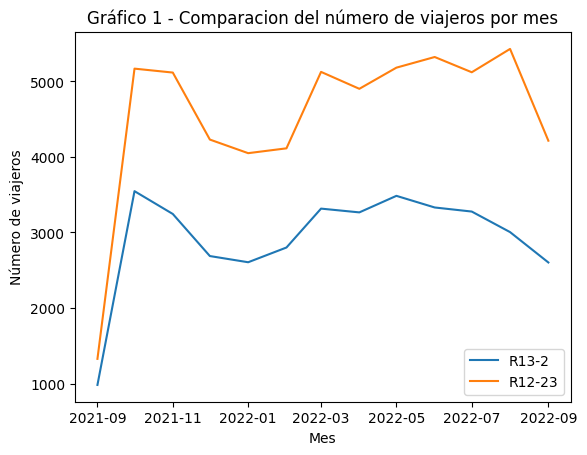

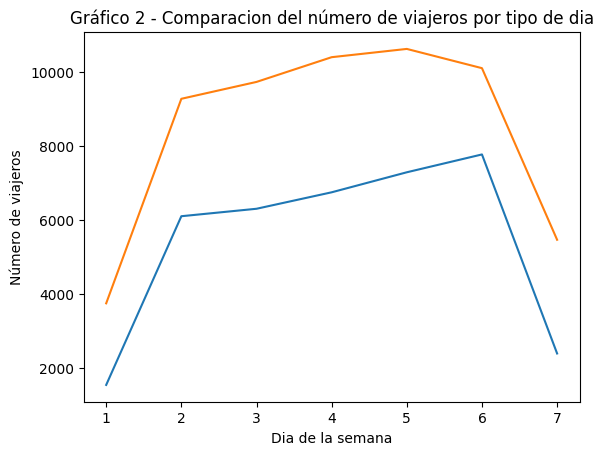

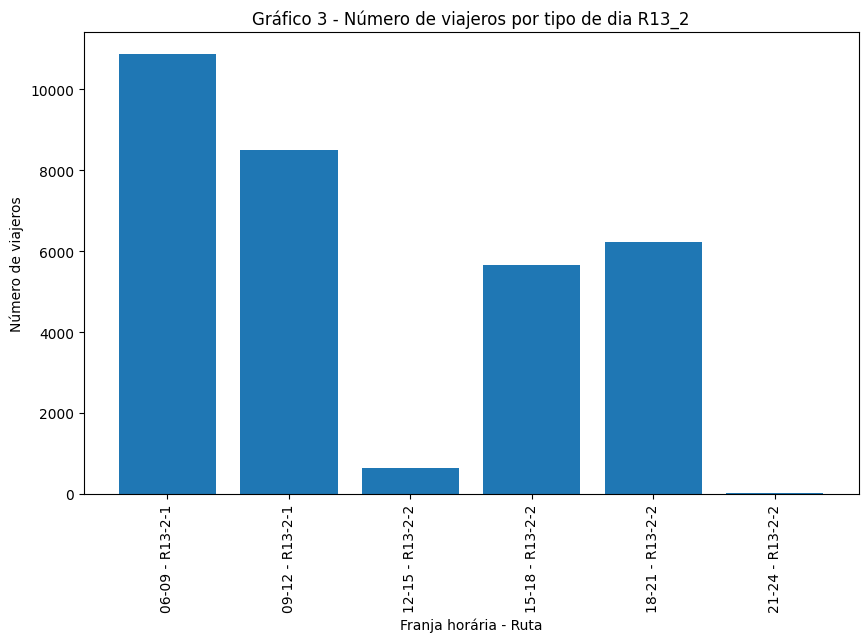

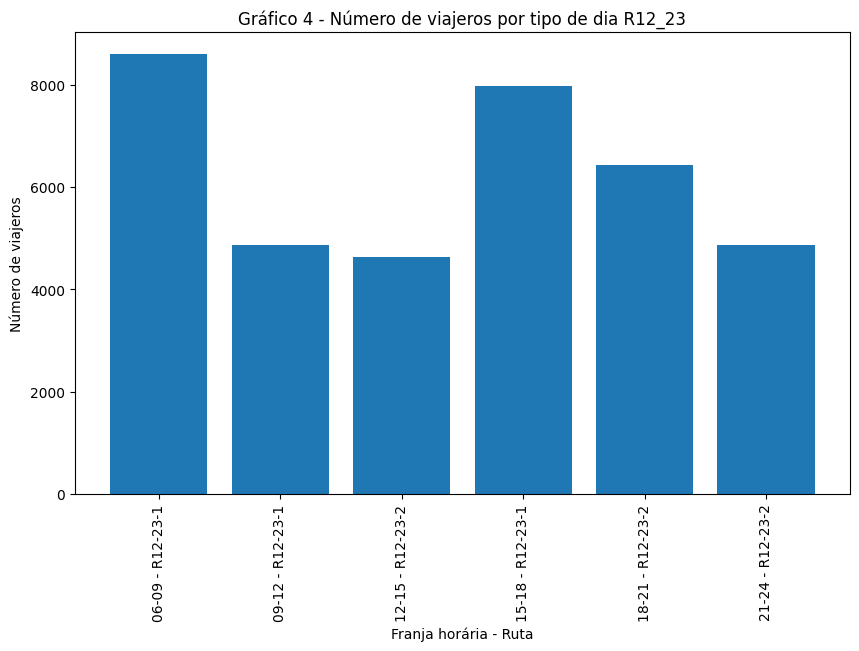

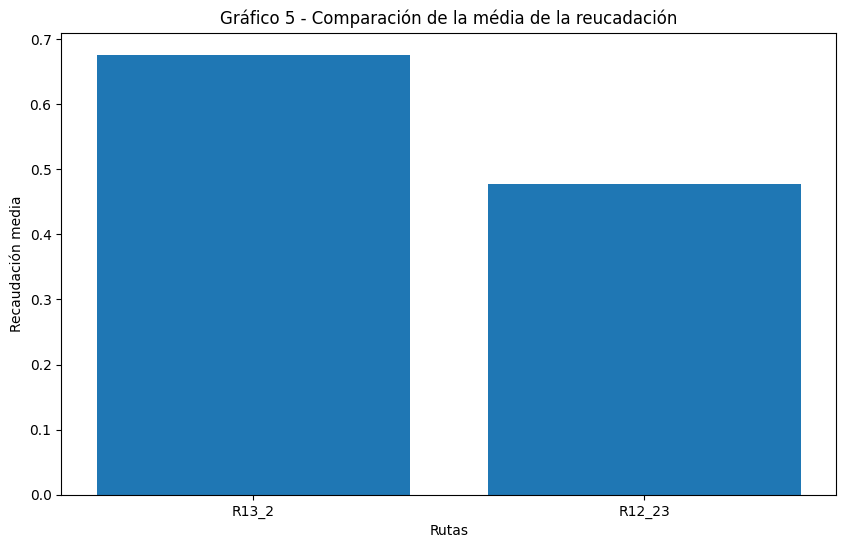

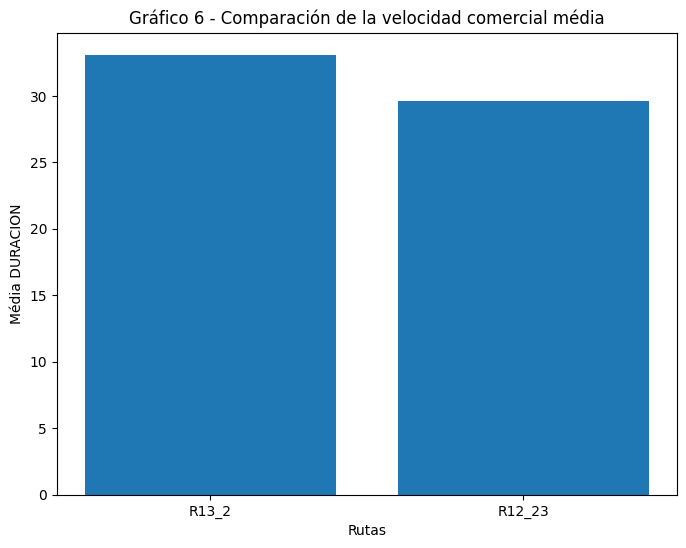

In [ ]:
#Empezamos a construir gráficos en base a analizar nuestros datos.

import matplotlib.pyplot as plt

#Empezamos por un gráfico de lineas que compara el número de viajeros por mes entre las dos lines.

R13_2_grouped = R13_2.groupby('MES')['VIAJEROS'].sum().reset_index()
R13_2_sorted = R13_2_grouped.sort_values(by='MES')

R12_23_grouped = R12_23.groupby('MES')['VIAJEROS'].sum().reset_index()
R12_23_sorted = R12_23_grouped.sort_values(by='MES')

plt.plot(R13_2_sorted['MES'], R13_2_sorted['VIAJEROS'], label='R13-2')
plt.plot(R12_23_sorted['MES'], R12_23_sorted['VIAJEROS'], label='R12-23')

plt.xlabel('Mes')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 1 - Comparacion del número de viajeros por mes')

plt.legend()
plt.show()

#Repetimos el proceso con el tipo de dia.

R13_2_grouped = R13_2.groupby('TIPO_DIA')['VIAJEROS'].sum().reset_index()
R13_2_sorted = R13_2_grouped.sort_values(by='TIPO_DIA')

R12_23_grouped = R12_23.groupby('TIPO_DIA')['VIAJEROS'].sum().reset_index()
R12_23_sorted = R12_23_grouped.sort_values(by='TIPO_DIA')

plt.plot(R13_2_sorted['TIPO_DIA'], R13_2_sorted['VIAJEROS'], label='R13-2')
plt.plot(R12_23_sorted['TIPO_DIA'], R12_23_sorted['VIAJEROS'], label='R12-23')

plt.xlabel('Dia de la semana')
plt.ylabel('Número de viajeros')
plt.title('Gráfico 2 - Comparacion del número de viajeros por tipo de dia')

#Volvemos a repetir con la franja horária.
#En este caso tuvimos que colocar las dos rutas en gráficos diferentes.

rutas_por_franja = R13_2.groupby(['FRANJA_HORARIA', 'RUTA'])['VIAJEROS'].sum()
rutas_populares = rutas_por_franja.groupby('FRANJA_HORARIA').idxmax()
valores_populares = [rutas_por_franja[f] for f in rutas_populares]
labels = [f"{franja} - {rota}" for franja, rota in rutas_populares]


plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 3 - Número de viajeros por tipo de dia R13_2')
plt.xlabel('Franja horária - Ruta')
plt.ylabel('Número de viajeros')

plt.show()

rutas_por_franja = R12_23.groupby(['FRANJA_HORARIA', 'RUTA'])['VIAJEROS'].sum()
rutas_populares = rutas_por_franja.groupby('FRANJA_HORARIA').idxmax()
valores_populares = [rutas_por_franja[f] for f in rutas_populares]
labels = [f"{franja} - {rota}" for franja, rota in rutas_populares]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rutas_populares)), valores_populares)
plt.xticks(range(len(rutas_populares)), labels, rotation=90)

plt.title('Gráfico 4 - Número de viajeros por tipo de dia R12_23')
plt.xlabel('Franja horária - Ruta')
plt.ylabel('Número de viajeros')

plt.show()

#En el gráfico 3 se demuestra la recaudacion por km de cada una de las rutas.
#Una vez que las dos rutas tienen longitud muy distinta no seria correcto analizar\
#la recudación abosluta.

recauda_total1 = R13_2['RECAUDA_TOTAL'].mean()/R13_2['KM'].mean()
recauda_total2 = R12_23['RECAUDA_TOTAL'].mean()/R12_23['KM'].mean()

datos = [recauda_total1, recauda_total2]
labels = ['R13_2', 'R12_23']

plt.figure(figsize=(10, 6))
plt.bar(labels, datos)
plt.xlabel('Rutas')
plt.ylabel('Recaudación media')
plt.title('Gráfico 5 - Comparación de la média de la reucadación')
plt.show()


#En esta fase comparamos las dos rutas según su velocidad comercial.

media_duracion1 = R13_2['VEL_COMERCIAL'].mean()
media_duracion2 = R12_23['VEL_COMERCIAL'].mean()

datos = [media_duracion1, media_duracion2]
labels = ['R13_2', 'R12_23']

plt.figure(figsize=(8, 6))
plt.bar(labels, datos)
plt.xlabel('Rutas')
plt.ylabel('Média DURACION')
plt.title('Gráfico 6 - Comparación de la velocidad comercial média')
plt.show()

Empezando por el gráfico 1, podemos ver que la R12-23 es más popular pero tambien pdoemos ver que las dos rutas siguen las mismas tendencias. Y por supuesto, se notan claramente la falta de datos en mayo de 2021 y en los dos meses de septiembre.

En relación a los tipos de dia, las dos lineas siguen la tendencia general de las lineas regulares. Por otras palabras, asistimos a poco movimiento durante los dias de fin de semana y bastante durante los dias laborales. Durante los dias laborales vemos una pequeña tendencia de subida a la medida que nos acercamos del viernes.

En los gráficos 3 y 4 decidimos separar las rutas por ida y vuelta. Y aqui vemos diferencias entre las dos rutas. Mientras en la R13-2, una ruta larga que conecta entornos rurales con entorno urbano, tiene los movimientos pendulares muy bien marcados. Por otra palabras, los viajeros se mueven más en el sentido de la ciudad hasta las 12h y luego empiezan a volver al interior de la provincia a partir de las 15:00.

Por otro lado, la R12_23 no tiene sus movimientos tan claros. Esto se puede explicar por su naturaleza en la cual hay movimientos de trabajo en ambos los sentidos (de un lado tenemos la ciudad y del otro un pueblo altamente industrial que tiene la capacidad de atraer tráfico). La longitud de la ruta, cerca de 20 km, y la elevada frecuencia de expediciones permite que la gente pueda hacer vários trayectos al dia.

El gráfico 5 demuestra que la R13_2 presenta una recaudación por km un poco más elevada. Este valor puede dejar dudas una vez que como vimos, hay una correlación fuerte entre recaudación y el número de viajeros y esta ruta tiene menos viajeros que la R12_23. Esto se explica por la elevada porcentaje de pagos en efectivo que presupone una tarifa más alta.

Por fin, tenemos una comparación de las velocidades comerciales de cada una de las rutas. La R13_2 presenta una velocidad más atractiva lo que se explica por su recorrido en zonas menos densidad poblacional, y consecuentemente, con menos paradas.

Construcción de modelo

El siguiente paso es contruir un modelo que pueda predicir el número de viajeros de la ruta R12_23.





In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

R12_23 = R12_23.sort_values('SALIDA')

#Convertimos la columna SALIDA (fechas) en dias de semana y meses, una vez que//
#el número de viajeros oscila por tipos de dias de semana y por meses.

R12_23['FECHA'] = R12_23['SALIDA'].dt.dayofweek
R12_23['MES_NUMERICO'] = R12_23['SALIDA'].dt.month

num_lags = 7 #Consideramos siete lags que corresponden a los siete dias de la semana.
for i in range(1, num_lags+1):
    R12_23[f'FECHA_Lag{i}'] = R12_23['FECHA'].shift(i)

num_lags = 3 #Consideramos tres meses una vez que que la variación anual es progresiva.
for i in range(1, num_lags+1):
    R12_23[f'MES_NUMERICO_Lag{i}'] = R12_23['MES_NUMERICO'].shift(i)

R12_23 = R12_23.dropna() #borramos las lineas con valores nulos.

# Variables exogenas
X = R12_23[['FECHA_Lag1', 'FECHA_Lag2', 'FECHA_Lag3', 'FECHA_Lag4', 'FECHA_Lag5', 'FECHA_Lag6', 'FECHA_Lag7', 'MES_NUMERICO_Lag1', 'MES_NUMERICO_Lag2', 'MES_NUMERICO_Lag3']]
y = R12_23['VIAJEROS']

split_index = int(0.8 * len(X)) #corte de datos en 80% para entrenamiento y 20% para test.

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

model = LinearRegression() #definimos el modelo.
model.fit(X_train, y_train) #entrenamos el modelo.

y_pred = model.predict(X_test) #cálculo de prediciones

mae_test = mean_absolute_error(y_test, y_pred) #error médio absoluto
print('Mean Absolute Error (Test Set):', mae_test)

y_pred_cv = model.predict(X) #cálculo de prediciones bajo el método de cross validation.

#Creamos los siguientes itens para la construcción del gráfico y representar la//
#división de las fechas del año el train y test.
fechas_train = R12_23.iloc[0:len(X_train), R12_23.columns.get_loc('SALIDA')]
fechas_test = R12_23.iloc[len(X_train):, R12_23.columns.get_loc('SALIDA')]

mae_cv = mean_absolute_error(y, y_pred_cv) #error médio absoluto
print('Mean Absolute Error (Cross-Validation):', mae_cv)

rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #error cuadrado médio.
print('Root Mean Squared Error (RMSE):', rmse)


Mean Absolute Error (Test Set): 3.8450830061160692
Mean Absolute Error (Cross-Validation): 3.550326979290328
Root Mean Squared Error (RMSE): 5.261215478548873


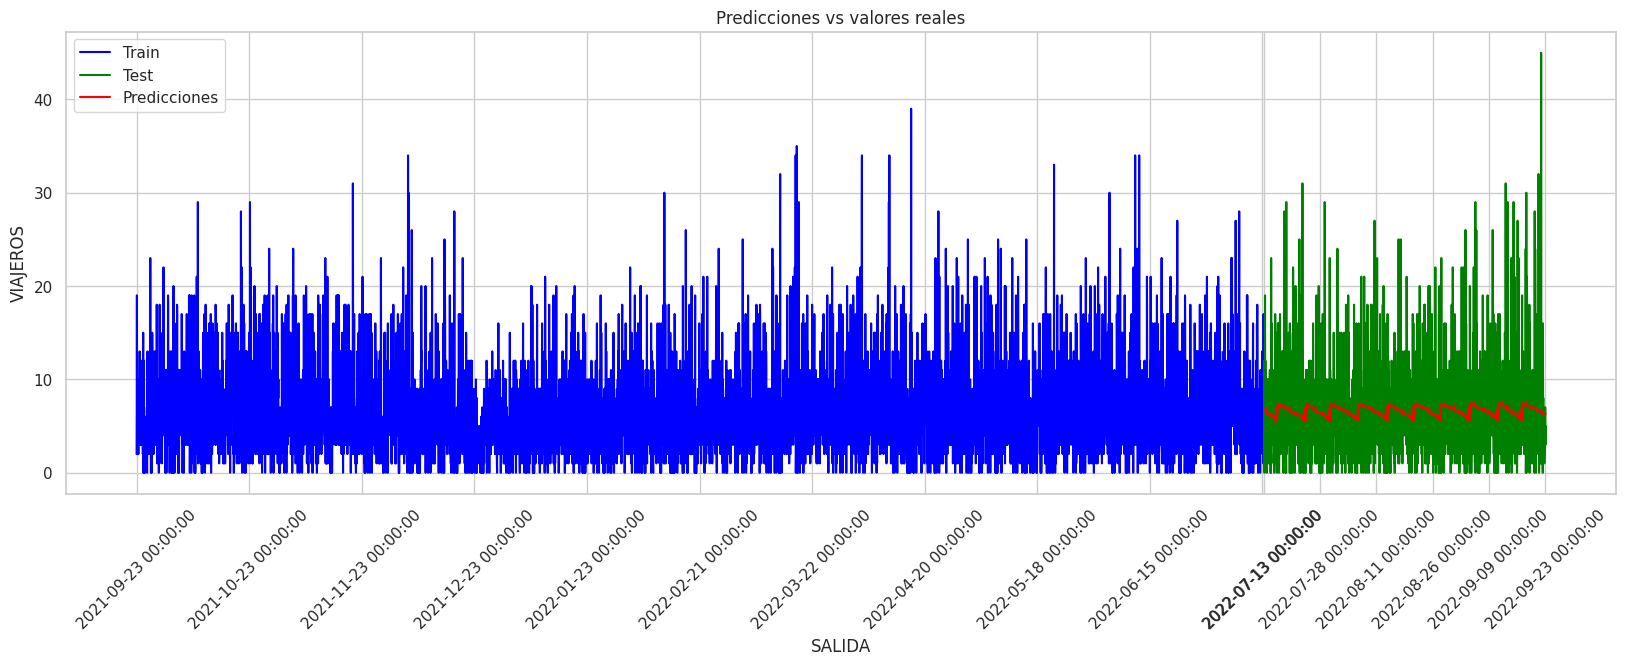

In [ ]:
#Graficamos el modelo donde representamos las predicciones bien como la separación//
#de las fechas que corresponden a train y test.

plt.figure(figsize=(20, 6))

x_range_train = range(len(y_train))
x_range_test = range(len(y_train), len(y_train) + len(y_test))

step_train = len(x_range_train) // 10
step_test = len(x_range_test) // 5

plt.plot(x_range_train, y_train, color='blue', label='Train')
plt.plot(x_range_test, y_test, color='green', label='Test')
plt.plot(x_range_test, y_pred, color='red', label='Predicciones')

plt.title('Predicciones vs valores reales')
plt.xlabel('SALIDA')
plt.ylabel('VIAJEROS')

plt.xticks(list(x_range_train)[::step_train] + list(x_range_test)[::step_test], list(fechas_train.iloc[::step_train]) + list(fechas_test.iloc[::step_test]), rotation=45)
plt.legend()

plt.show()

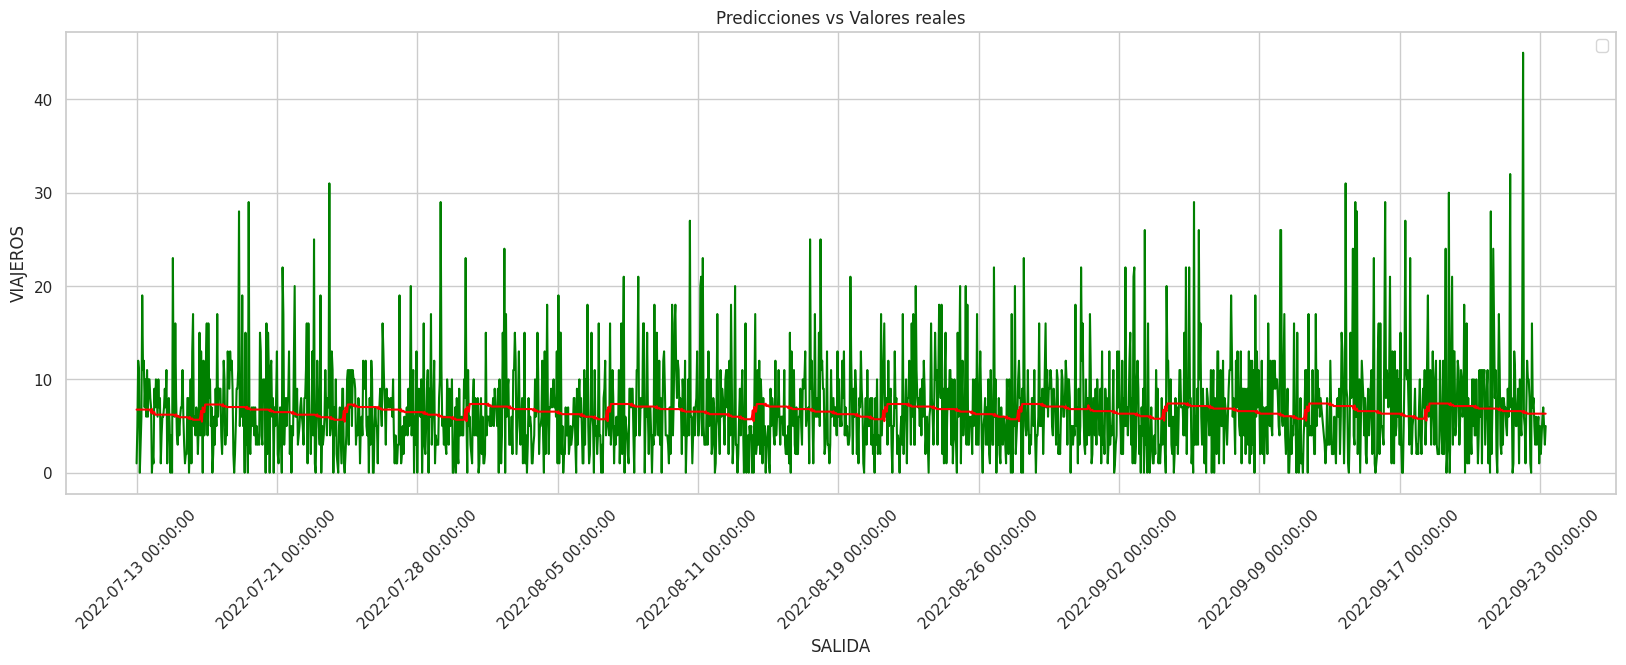

In [ ]:
#Graficamos las predicciones juntamente con las fechas que corresponden al test.


plt.figure(figsize=(20, 6))

x_range = range(len(y_train), len(y_train) + len(y_test))
step = len(x_range) // 10


plt.plot(x_range, y_test, color='green')
plt.plot(x_range, y_pred, color='red')

plt.title('Predicciones vs Valores reales')
plt.xlabel('SALIDA')
plt.ylabel('VIAJEROS')

plt.xticks(x_range[::step], fechas_test.iloc[::step], rotation=45)
plt.legend()

plt.show()